The other notebook was getting messy. This will be primarily to create the normality distributions using the various normality test functions.

In [1]:
#imports
from scipy import stats
import sympy as sp
import numpy as np
import pandas as pd

#plots
import matplotlib.pyplot as plt
import seaborn as sns

## Creating Function

In [2]:
def indicator(p_value, alpha=0.05):
    if p_value < alpha:
        return "Reject H0"
    else:
        return "Fail to Reject H0"

In [3]:
def ks_test(data, mu, sigma, n, m, crit_val_perc = 95):
    """
    Function to simulate the probability density of a KS-Test using Monte Carlo.
    ---
    Parameters: 'data' is the observed data.
                'mu' is the chosen mean of the distribution.
                'sigma' is the chosen standard deviation of the distribution.
                'n' is the # of samples per simulation.
                'm' is the # of simulations.
                'crit_val_perc' is the percentile of which the critical value will be calculated.
    Returns:
        - critical value of null hypothesis 'ks_crit'
        - observed ks-statistic
        - p_value
        - indicator whether to reject the null hypothesis
    """
    D = np.zeros(m)

    for i in range(m):
        sample = np.sort(np.random.normal(mu, sigma, n))
        emp_cdf = np.arange(1, n+1) / n
        null_cdf = stats.norm.cdf(sample, loc=mu, scale=sigma)
        D[i] = np.max(np.abs(emp_cdf - null_cdf))  #test-statistic

    #__% critical value
    ks_crit = np.percentile(D, crit_val_perc)

    data_sorted = np.sort(data)
    empirical_cdf = np.arange(1, n+1) / n
    null_cdf = stats.norm.cdf(data_sorted, loc=mu, scale=sigma)
    ks_observed = np.max(np.abs(empirical_cdf - null_cdf))  #observed KS statistic

    #empirical p-value
    p_value = np.mean(D >= ks_observed)
    return {"D": D, "ks_crit": ks_crit, "ks_observed": ks_observed, "p_value": p_value, "indicator_fn": indicator(p_value)}

In [4]:
def lilliefors_test(data, n, m, crit_val_perc):
    """
    Function to simulate the probability density of a Lilliefors Test using Monte Carlo.
    ---
    Parameters: 'data' is the observed data.
                'n' is the # of samples per simulation. Note that the appropriate amount of samples for this test should be < 30.
                'm' is the # of simulations.
                'crit_val_perc' is the percentile of which the critical value will be calculated.
    Returns:
        - critical value of null hypothesis '_crit'
        - observed lillifors-statistic
        - p_value
        - indicator whether to reject the null hypothesis
    """
    D = np.zeros(m)
    rng = np.random.default_rng() #default is mu = 0, std = 1 -> going to assume that data is standardized normal
    for i in range(m):
        sample = np.sort(rng.normal(size=n))
        sample_mean = np.mean(sample) #get sample mean
        sample_std = np.std(sample) #get sample std
        emp_cdf = np.arange(1, n+1) / n
        null_cdf = stats.norm.cdf(sample, loc=sample_mean, scale=sample_std)
        D[i] = np.max(np.abs(emp_cdf - null_cdf))  #test-statistic

    #__% critical value
    lil_crit = np.percentile(D, crit_val_perc)

    data_sorted = np.sort(sample)
    empirical_cdf = np.arange(1, n+1) / n
    sample_mean = np.mean(data_sorted); sample_std = np.std(data_sorted);
    null_cdf = stats.norm.cdf(data_sorted, loc=sample_mean, scale=sample_std)
    lil_observed = np.max(np.abs(empirical_cdf - null_cdf))  #observed KS statistic

    #empirical p-value
    p_value = np.mean(D >= lil_observed)
    return {"D": D, "lil_crit": lil_crit , "lil_observed": lil_observed, "p_value": p_value, "indicator_fn": indicator(p_value)}

In [5]:
def generate_ar1(n, phi=0.8, mu=0, sigma=1.0, x0=0):
    """
    Generate AR(1) autocorrelated data.
    n: Number of time points
    phi: Autocorrelation coefficient (between -1 and 1)
    sigma: Std. dev. of the noise
    x0: Initial value
    """
    x = np.zeros(n)
    x[0] = x0
    for t in range(1, n):
        x[t] = phi * x[t - 1] + np.random.normal(mu, sigma)
    return x

## KS Test

### Normal Data

Rejection rate: 0.049987


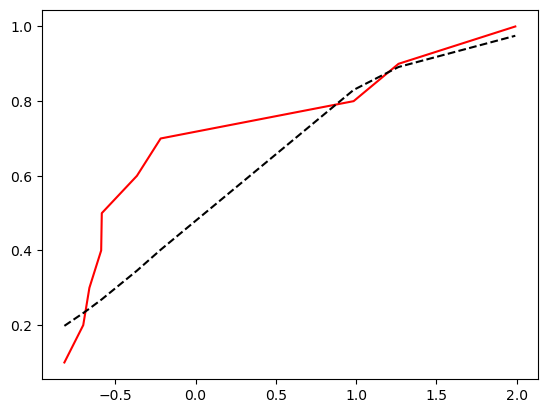

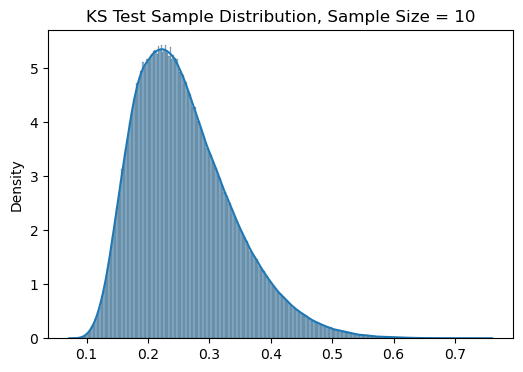

In [11]:
#see cdf and pdf for phi = 0
#use standard normal parameters
#sample size of 10
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 10
stats_values_ks_10 = [] #array of test statistics for ks with size 10

rejections = []
for i in range(n_trials):
    data = np.sort(rng.normal(size=sample_size));
    result = stats.kstest(data, stats.norm.cdf);
    pvalue = result[1] #get p-value only of tuple
    stats_values_ks_10.append(result[0])
    rejections.append(pvalue);

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF');
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') ;
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_ks_10, kde=True, stat='density', label='Sample PDF');
plt.title(f'KS Test Sample Distribution, Sample Size = {sample_size}');
rejection_rate = np.mean(np.array(rejections) < 0.05);
print(f'Rejection rate: {rejection_rate}');

Rejection rate: 0.049639


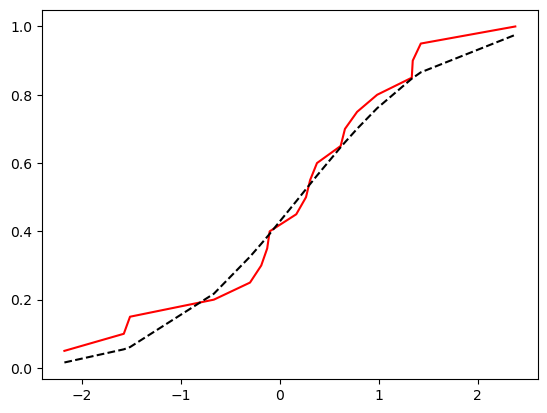

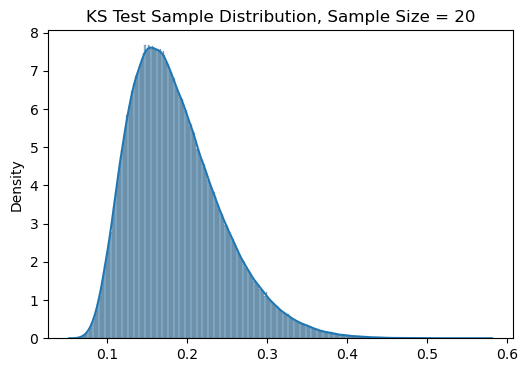

In [12]:
#see cdf and pdf for phi = 0
#use standard normal parameters
#sample size of 20
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 20
stats_values_ks_20 = [] 

rejections = []
for i in range(n_trials):
    data = np.sort(rng.normal(size=sample_size));
    result = stats.kstest(data, stats.norm.cdf);
    pvalue = result[1] #get p-value only of tuple
    stats_values_ks_20.append(result[0])
    rejections.append(pvalue);

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF');
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') ;
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_ks_20, kde=True, stat='density', label='Sample PDF');
plt.title(f'KS Test Sample Distribution, Sample Size = {sample_size}');
rejection_rate = np.mean(np.array(rejections) < 0.05);
print(f'Rejection rate: {rejection_rate}');

Rejection rate: 0.050041


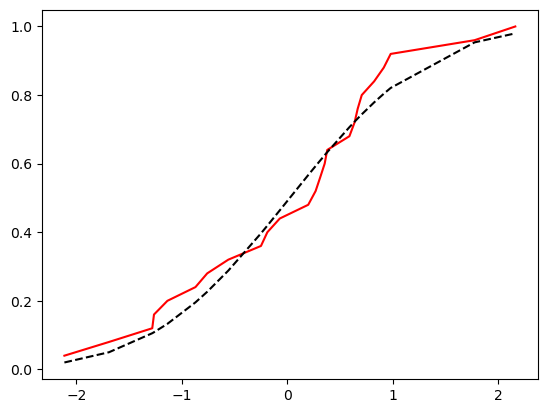

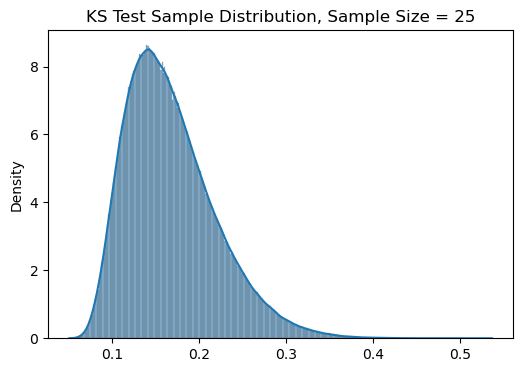

In [14]:
#see cdf and pdf for phi = 0
#use standard normal parameters
#sample size of 25
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 25
stats_values_ks_25 = [] 

rejections = []
for i in range(n_trials):
    data = np.sort(rng.normal(size=sample_size));
    result = stats.kstest(data, stats.norm.cdf);
    pvalue = result[1] #get p-value only of tuple
    stats_values_ks_25.append(result[0])
    rejections.append(pvalue);

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF');
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') ;
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_ks_25, kde=True, stat='density', label='Sample PDF');
plt.title(f'KS Test Sample Distribution, Sample Size = {sample_size}');
rejection_rate = np.mean(np.array(rejections) < 0.05);
print(f'Rejection rate: {rejection_rate}');

Rejection rate: 0.049616


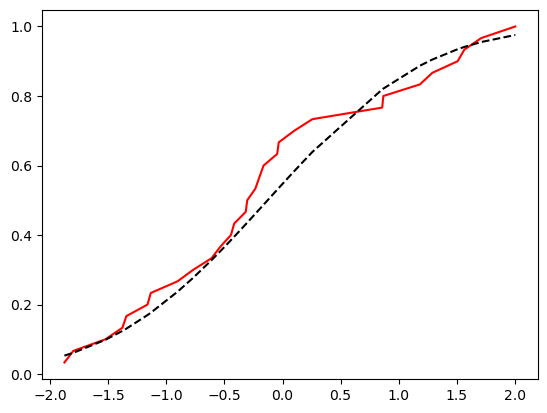

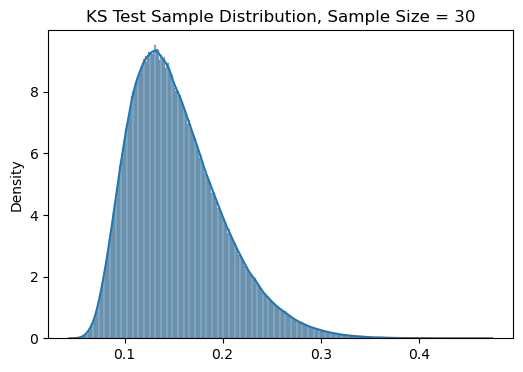

In [15]:
#see cdf and pdf for phi = 0
#use standard normal parameters
#sample size of 30
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 30
stats_values_ks_30 = [] 

rejections = []
for i in range(n_trials):
    data = np.sort(rng.normal(size=sample_size));
    result = stats.kstest(data, stats.norm.cdf);
    pvalue = result[1] #get p-value only of tuple
    stats_values_ks_30.append(result[0])
    rejections.append(pvalue);

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF');
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') ;
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_ks_30, kde=True, stat='density', label='Sample PDF');
plt.title(f'KS Test Sample Distribution, Sample Size = {sample_size}');
rejection_rate = np.mean(np.array(rejections) < 0.05);
print(f'Rejection rate: {rejection_rate}');

Rejection rate: 0.049982


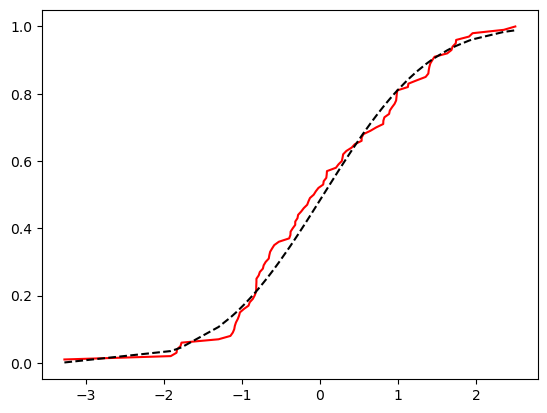

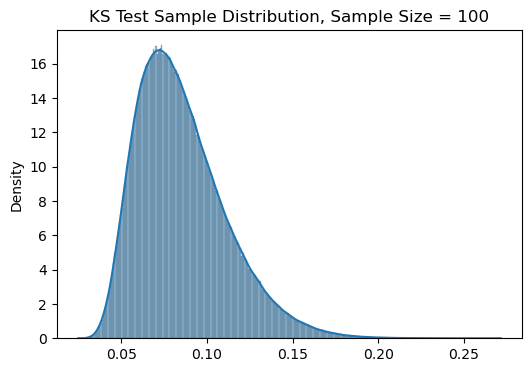

In [16]:
#see cdf and pdf for phi = 0
#use standard normal parameters
#sample size of 100
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 100
stats_values_ks_100 = [] 

rejections = []
for i in range(n_trials):
    data = np.sort(rng.normal(size=sample_size));
    result = stats.kstest(data, stats.norm.cdf);
    pvalue = result[1] #get p-value only of tuple
    stats_values_ks_100.append(result[0])
    rejections.append(pvalue);

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF');
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') ;
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_ks_100, kde=True, stat='density', label='Sample PDF');
plt.title(f'KS Test Sample Distribution, Sample Size = {sample_size}');
rejection_rate = np.mean(np.array(rejections) < 0.05);
print(f'Rejection rate: {rejection_rate}');

In [19]:
#save test statistics data to df -> csv for easy retrieval
data = {'stats_ks_values_10' : stats_values_ks_10,
        'stats_ks_values_20' : stats_values_ks_20,
        'stats_ks_values_25' : stats_values_ks_25,
        'stats_ks_values_30' : stats_values_ks_30,
        'stats_ks_values_100' : stats_values_ks_100}
ks_norm_data = pd.DataFrame(data)
#uncorrelated lilliefors test statistics
ks_norm_data.to_csv('ks_norm_data.csv', index=False)

In [20]:
ks_norm_data

,stats_ks_values_10,stats_ks_values_20,stats_ks_values_25,stats_ks_values_30,stats_ks_values_100
0,0.214038,0.175720,0.168629,0.112007,0.066067
1,0.330818,0.162342,0.139011,0.151624,0.104798
2,0.294321,0.212422,0.160205,0.153740,0.074477
3,0.143285,0.218526,0.165742,0.180622,0.111210
4,0.123750,0.165809,0.115744,0.069652,0.063252
...,...,...,...,...,...
999995,0.285563,0.203118,0.115776,0.182973,0.070819
999996,0.251997,0.173215,0.109033,0.146143,0.111795
999997,0.298468,0.082723,0.138596,0.126707,0.085508
999998,0.170425,0.109451,0.113427,0.182163,0.071273


In [78]:
ks_norm_data = pd.read_csv('ks_norm_data.csv')

### Autocorrelated Data

Rejection rate: 0.174305


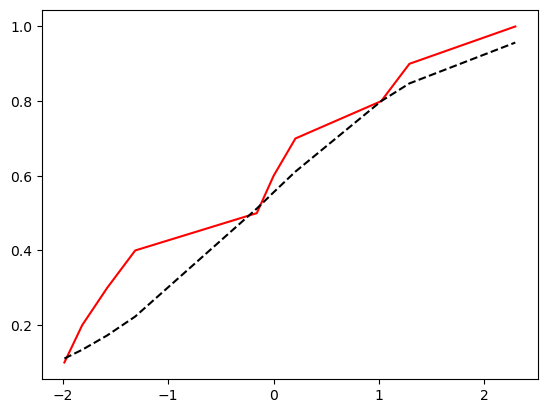

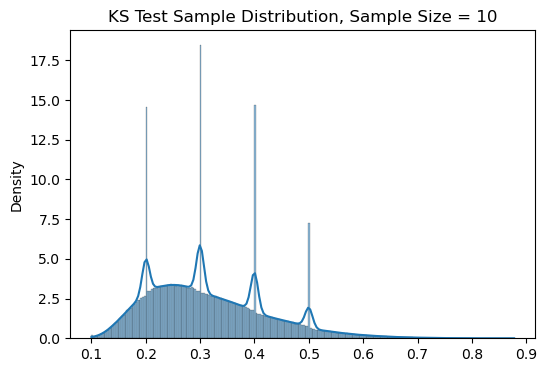

In [6]:
#use standard normal parameters
#sample size of 10
n_trials = 1000000
sample_size = 10
stats_values_ks_10 = [] 

rejections = []
for i in range(n_trials):
    data = np.sort(generate_ar1(n=sample_size, phi=0.5))
    result = stats.kstest(data, stats.norm.cdf);
    pvalue = result[1] #get p-value only of tuple
    stats_values_ks_10.append(result[0])
    rejections.append(pvalue);

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF');
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') ;
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_ks_10, kde=True, stat='density', label='Sample PDF');
plt.title(f'KS Test Sample Distribution, Sample Size = {sample_size}');
rejection_rate = np.mean(np.array(rejections) < 0.05);
print(f'Rejection rate: {rejection_rate}');

Rejection rate: 0.229039


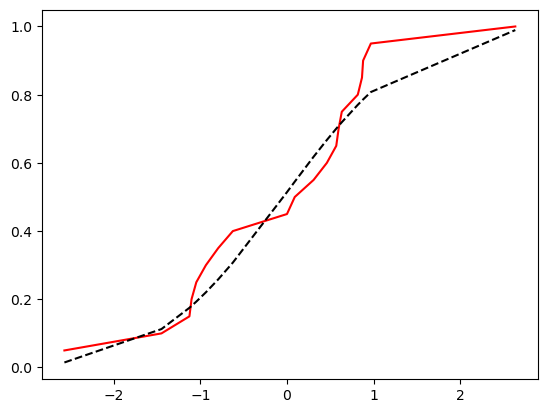

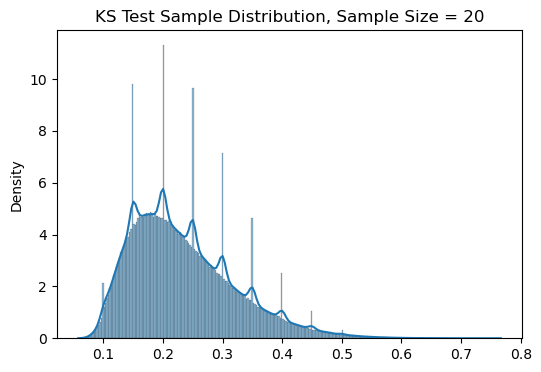

In [7]:
#sample size of 20
n_trials = 1000000
sample_size = 20
stats_values_ks_20 = [] 

rejections = []
for i in range(n_trials):
    data = np.sort(generate_ar1(n=sample_size, phi=0.5))
    result = stats.kstest(data, stats.norm.cdf);
    pvalue = result[1] #get p-value only of tuple
    stats_values_ks_20.append(result[0])
    rejections.append(pvalue);

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF');
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') ;
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_ks_20, kde=True, stat='density', label='Sample PDF');
plt.title(f'KS Test Sample Distribution, Sample Size = {sample_size}');
rejection_rate = np.mean(np.array(rejections) < 0.05);
print(f'Rejection rate: {rejection_rate}');

Rejection rate: 0.228939


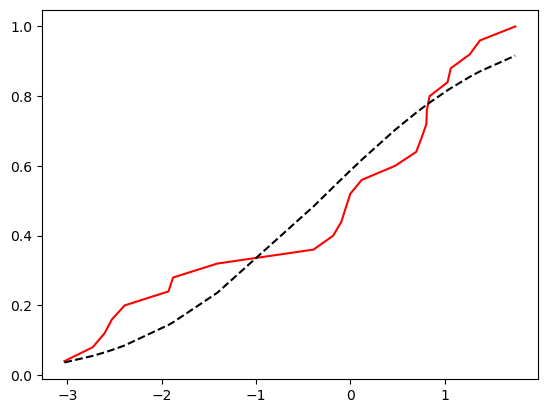

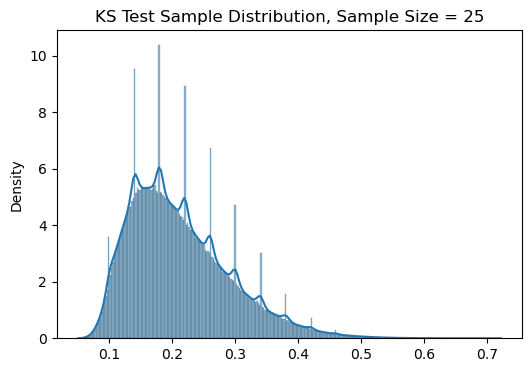

In [8]:
#sample size of 25
n_trials = 1000000
sample_size = 25
stats_values_ks_25 = [] 

rejections = []
for i in range(n_trials):
    data = np.sort(generate_ar1(n=sample_size, phi=0.5))
    result = stats.kstest(data, stats.norm.cdf);
    pvalue = result[1] #get p-value only of tuple
    stats_values_ks_25.append(result[0])
    rejections.append(pvalue);

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF');
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') ;
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_ks_25, kde=True, stat='density', label='Sample PDF');
plt.title(f'KS Test Sample Distribution, Sample Size = {sample_size}');
rejection_rate = np.mean(np.array(rejections) < 0.05);
print(f'Rejection rate: {rejection_rate}');

Rejection rate: 0.23698


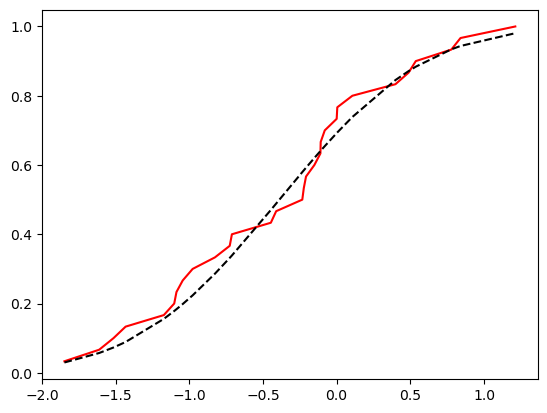

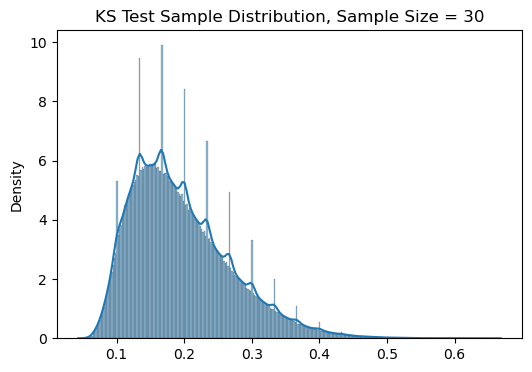

In [9]:
#sample size of 30
n_trials = 1000000
sample_size = 30
stats_values_ks_30 = [] 

rejections = []
for i in range(n_trials):
    data = np.sort(generate_ar1(n=sample_size, phi=0.5))
    result = stats.kstest(data, stats.norm.cdf);
    pvalue = result[1] #get p-value only of tuple
    stats_values_ks_30.append(result[0])
    rejections.append(pvalue);

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF');
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') ;
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_ks_30, kde=True, stat='density', label='Sample PDF');
plt.title(f'KS Test Sample Distribution, Sample Size = {sample_size}');
rejection_rate = np.mean(np.array(rejections) < 0.05);
print(f'Rejection rate: {rejection_rate}');

Rejection rate: 0.296866


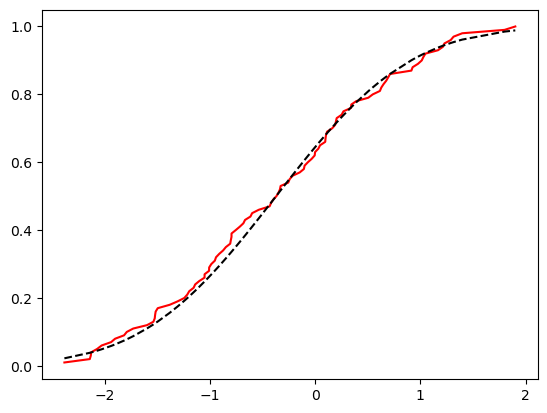

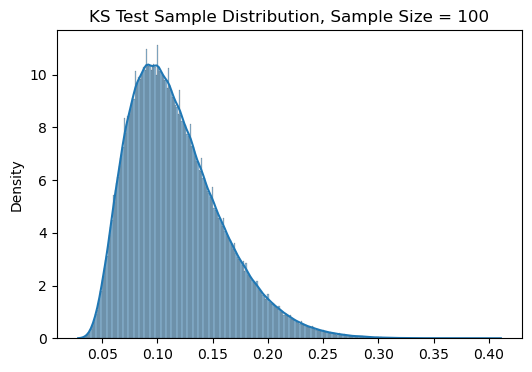

In [10]:
#sample size of 100
n_trials = 1000000
sample_size = 100
stats_values_ks_100 = [] 

rejections = []
for i in range(n_trials):
    data = np.sort(generate_ar1(n=sample_size, phi=0.5))
    result = stats.kstest(data, stats.norm.cdf);
    pvalue = result[1] #get p-value only of tuple
    stats_values_ks_100.append(result[0])
    rejections.append(pvalue);

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF');
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') ;
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_ks_100, kde=True, stat='density', label='Sample PDF');
plt.title(f'KS Test Sample Distribution, Sample Size = {sample_size}');
rejection_rate = np.mean(np.array(rejections) < 0.05);
print(f'Rejection rate: {rejection_rate}');

In [11]:
#save test statistics data to df -> csv for easy retrieval
data = {'stats_ks_values_10' : stats_values_ks_10,
        'stats_ks_values_20' : stats_values_ks_20,
        'stats_ks_values_25' : stats_values_ks_25,
        'stats_ks_values_30' : stats_values_ks_30,
        'stats_ks_values_100' : stats_values_ks_100}
ks_correlated_data = pd.DataFrame(data)
#uncorrelated lilliefors test statistics
ks_correlated_data.to_csv('ks_correlated_data.csv', index=False)

In [12]:
ks_correlated_data

,stats_ks_values_10,stats_ks_values_20,stats_ks_values_25,stats_ks_values_30,stats_ks_values_100
0,0.543673,0.130060,0.181542,0.211983,0.123043
1,0.500000,0.252178,0.087663,0.194606,0.192770
2,0.669978,0.257571,0.271536,0.132779,0.092296
3,0.185071,0.242798,0.180000,0.122219,0.051002
4,0.256661,0.218103,0.201614,0.141574,0.061468
...,...,...,...,...,...
999995,0.288652,0.209432,0.120176,0.138249,0.091775
999996,0.319919,0.176277,0.198377,0.124183,0.146461
999997,0.235930,0.223434,0.204745,0.272107,0.113650
999998,0.376181,0.285786,0.180000,0.214594,0.167409


In [13]:
#making autocorrelation plot with different phi's, sample size n, differerent type I error
phi_vals = np.arange(0,1.1,0.1)
mu, sigma = 0, 1
n_trials = 1000000
sample_size = 100

rejection_rates = []
for i in range(len(phi_vals)):
    rejections = []
    for j in range(n_trials):
        data = generate_ar1(n = sample_size, phi = phi_vals[i])
        result = stats.kstest(data, stats.norm.cdf);
        pvalue = result[1] #get p-value only of tuple 
        rejections.append(pvalue)
    rejection_rate = np.mean(np.array(rejections) < 0.05)
    rejection_rates.append(rejection_rate)

In [14]:
ks_rejection_rates_df = pd.DataFrame(rejection_rates)
ks_rejection_rates_df = ks_rejection_rates_df.set_axis(['Rejection Rates'], axis=1)
ks_rejection_rates_df['Phi Values'] = phi_vals
ks_rejection_rates_df.to_csv('ks_ar1_reject_rates.csv', index=False)
ks_rejection_rates_df

,Rejection Rates,Phi Values
0,0.048406,0.0
1,0.068142,0.1
2,0.094771,0.2
3,0.133689,0.3
4,0.195342,0.4
5,0.296836,0.5
6,0.460321,0.6
7,0.683268,0.7
8,0.891618,0.8
9,0.985542,0.9


In [33]:
#read csv rejection rates file that we saved
ks_rejection_rates_df = pd.read_csv('ks_ar1_reject_rates.csv')
#ks_rejection_rates_df

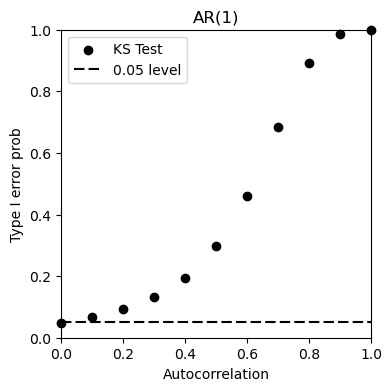

In [34]:
fig, ax = plt.subplots(figsize = (4,4))
plt.scatter(ks_rejection_rates_df['Phi Values'], ks_rejection_rates_df['Rejection Rates'], color = 'black', clip_on=False, label='KS Test'); #show points on axes
plt.xticks(np.arange(0, 1.2, 0.2)); plt.yticks(np.arange(0, 1.2, 0.2)); 
plt.xlim(0, 1.0); plt.ylim(0, 1.0); #make plot look nicer
plt.axhline(y=0.05, color = 'k', linestyle='--', dashes = (5,2), label = '0.05 level');
ax.legend()
plt.xlabel('Autocorrelation'); plt.ylabel('Type I error prob'); plt.title('AR(1)');

np.float64(0.09666)

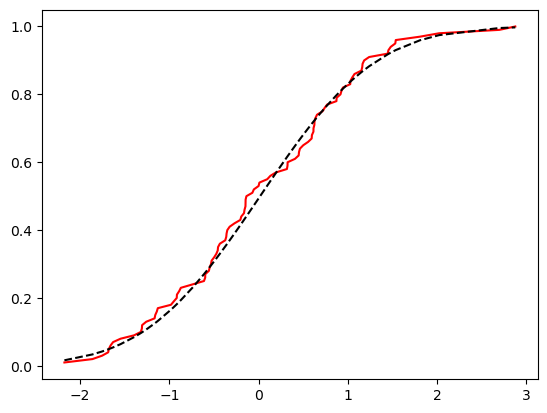

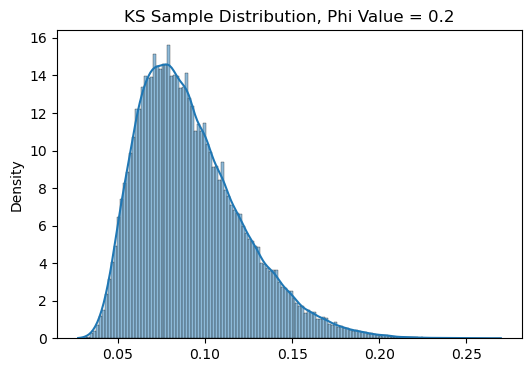

In [54]:
#sample size is 100
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 100000
sample_size = 100
stats_values_phi_1 = [] #array of test statistics for liiliefors with size 10
rejections = []
phi_val = 0.2

for i in range(n_trials):
    data = np.sort(generate_ar1(n=sample_size, phi=phi_val))
    result = stats.kstest(data, stats.norm.cdf); 
    pvalue = result[1] #get p-value only of tuple 
    stats_values_phi_1.append(result[0])
    rejections.append(pvalue)

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF')
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') 
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_phi_1, kde=True, stat='density', label='Sample PDF')
plt.title(f'KS Sample Distribution, Phi Value = {phi_val}')
rejection_rate = np.mean(np.array(rejections) < 0.05)
rejection_rate

np.float64(0.19382)

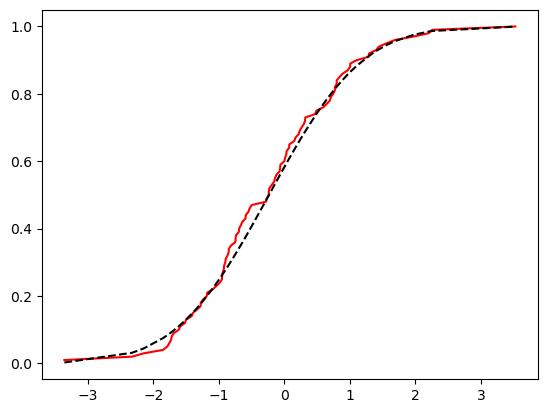

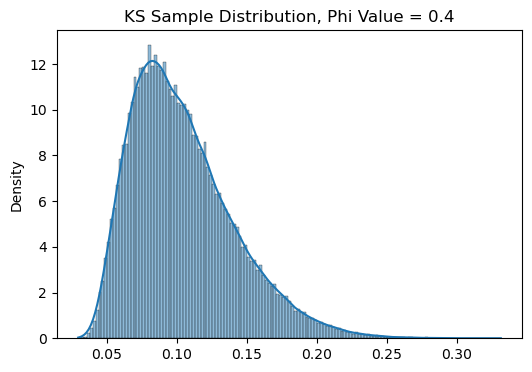

In [55]:
#sample size is 100
n_trials = 100000
sample_size = 100
stats_values_phi_2 = [] #array of test statistics for liiliefors with size 10
rejections = []
phi_val = 0.4

for i in range(n_trials):
    data = np.sort(generate_ar1(n=sample_size, phi=phi_val))
    result = stats.kstest(data, stats.norm.cdf); 
    pvalue = result[1] #get p-value only of tuple 
    stats_values_phi_2.append(result[0])
    rejections.append(pvalue)

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF')
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') 
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_phi_2, kde=True, stat='density', label='Sample PDF')
plt.title(f'KS Sample Distribution, Phi Value = {phi_val}')
rejection_rate = np.mean(np.array(rejections) < 0.05)
rejection_rate

np.float64(0.89301)

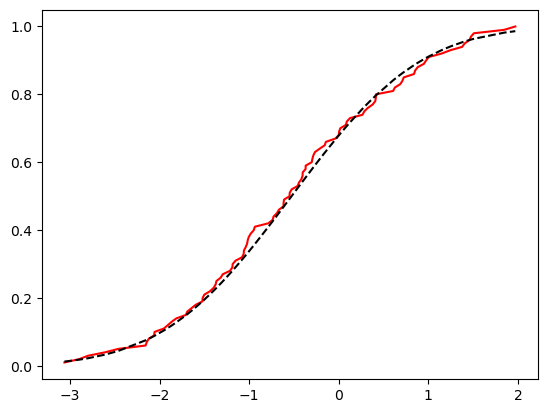

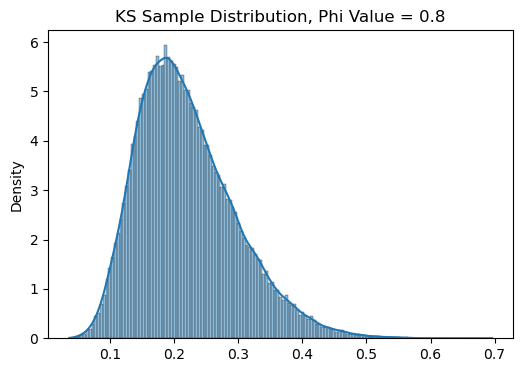

In [56]:
#sample size is 100
n_trials = 100000
sample_size = 100
stats_values_phi_3 = [] #array of test statistics for liiliefors with size 10
rejections = []
phi_val = 0.8

for i in range(n_trials):
    data = np.sort(generate_ar1(n=sample_size, phi=phi_val))
    result = stats.kstest(data, stats.norm.cdf); 
    pvalue = result[1] #get p-value only of tuple 
    stats_values_phi_3.append(result[0])
    rejections.append(pvalue)

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF')
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') 
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_phi_3, kde=True, stat='density', label='Sample PDF')
plt.title(f'KS Sample Distribution, Phi Value = {phi_val}')
rejection_rate = np.mean(np.array(rejections) < 0.05)
rejection_rate

In [57]:
#save data to df -> csv
data = {'stats_values_phi_1': stats_values_phi_1,
        'stats_values_phi_2': stats_values_phi_2,
        'stats_values_phi_3': stats_values_phi_3}
ks_correlated_phi_data = pd.DataFrame(data)
#correlated ks test statistics
ks_correlated_phi_data.to_csv('ks_correlated_phi_data.csv', index=False)
ks_correlated_phi_data

,stats_values_phi_1,stats_values_phi_2,stats_values_phi_3
0,0.107478,0.073655,0.087447
1,0.069611,0.112864,0.252722
2,0.121643,0.053549,0.146058
3,0.092812,0.108761,0.133023
4,0.059035,0.124581,0.154492
...,...,...,...
99995,0.089425,0.170745,0.280110
99996,0.093030,0.150000,0.463539
99997,0.068042,0.060217,0.236552
99998,0.076802,0.091871,0.167587


In [58]:
ks_correlated_phi_data

,stats_values_phi_1,stats_values_phi_2,stats_values_phi_3
0,0.107478,0.073655,0.087447
1,0.069611,0.112864,0.252722
2,0.121643,0.053549,0.146058
3,0.092812,0.108761,0.133023
4,0.059035,0.124581,0.154492
...,...,...,...
99995,0.089425,0.170745,0.280110
99996,0.093030,0.150000,0.463539
99997,0.068042,0.060217,0.236552
99998,0.076802,0.091871,0.167587


In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))
palette = sns.color_palette("Set2", 5)
norm_columns = ['stats_values_lil_10', 'stats_values_lil_20', 'stats_values_lil_25', 'stats_values_lil_30']
labels = ['W10', 'W20', 'W25', 'W30']

#normal data
for i, (col, label) in enumerate(zip(columns, labels)): #zip is to tie each column to the right label in the plot
    sns.kdeplot(ks_norm_data[col], label=label, color=palette[i])

#correlated data
sns.kdeplot(ks_norm_data['stats_values_lil_100'], label='Phi = 0', linestyle='-', color='red')
sns.kdeplot(ks_correlated_phi_data['stats_values_phi_1'], label='Phi = 0.2', linestyle='--', color='red')
sns.kdeplot(ks_correlated_phi_data['stats_values_phi_2'], label='Phi = 0.4', linestyle='-.', color='red')
sns.kdeplot(ks_correlated_phi_data['stats_values_phi_3'], label='Phi = 0.8', linestyle=':', color='red')
    
plt.legend()
plt.xlabel('Test statistic values')
plt.legend();

## Lilliefors Test

In [46]:
#imports
from statsmodels.stats._lilliefors import (
    kstest_exponential,
    kstest_fit,
    kstest_normal,
    lilliefors,
)

### Normal data (uncorrelated)

Rejection rate: 0.050326


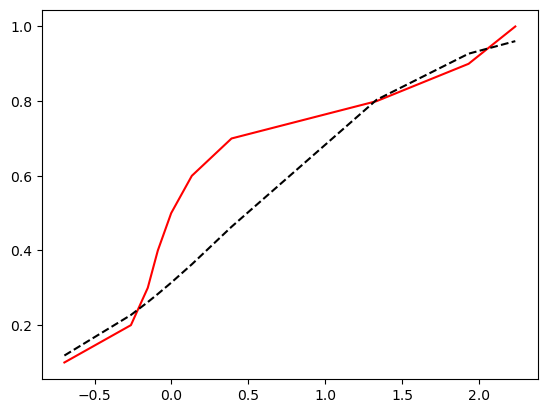

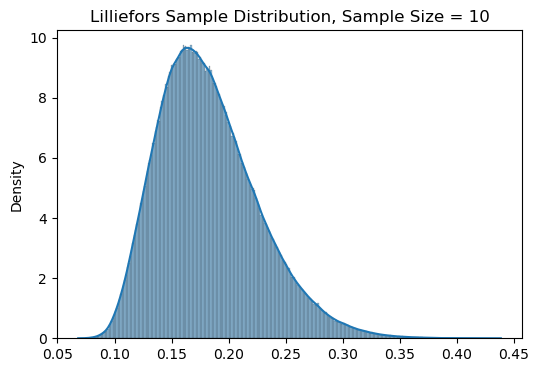

In [28]:
#see cdf and pdf for phi = 0
#use standard normal parameters
#using sample statistics now instead of set mu and sigma
#sample size of 10
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 10
stats_values_lil_10 = [] #array of test statistics for lilliefors with size 10

rejections = []
for i in range(n_trials):
    data = np.sort(rng.normal(size=sample_size));
    #dist = norm estimates from each sample instead of using the known mu and std
    result = lilliefors(data, dist='norm', pvalmethod='table'); #table uses a very large simulation
    pvalue = result[1] #get p-value only of tuple
    stats_values_lil_10.append(result[0])
    rejections.append(pvalue);

emp_cdf = np.arange(1, sample_size + 1) / sample_size
mu_hat = np.mean(data)
sigma_hat = np.std(data, ddof=1)
null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF');
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') ;
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_lil_10, kde=True, stat='density', label='Sample PDF');
plt.title(f'Lilliefors Sample Distribution, Sample Size = {sample_size}');
rejection_rate = np.mean(np.array(rejections) < 0.05);
print(f'Rejection rate: {rejection_rate}');

Rejection rate: 0.050011


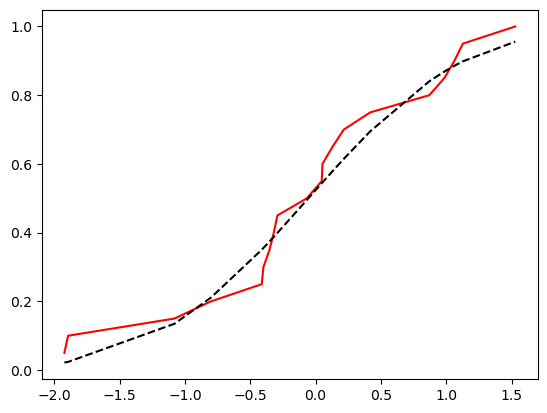

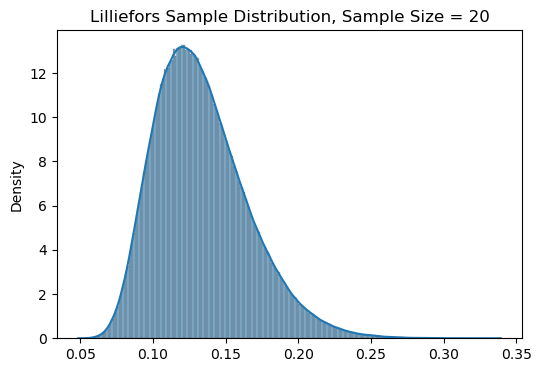

In [29]:
#see cdf and pdf for phi = 0
#use standard normal parameters
#using sample statistics now instead of set mu and sigma
#sample size of 20
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 20
stats_values_lil_20 = [] #array of test statistics for lilliefors with size 10

rejections = []
for i in range(n_trials):
    data = np.sort(rng.normal(size=sample_size));
    #dist = norm estimates from each sample instead of using the known mu and std
    result = lilliefors(data, dist='norm', pvalmethod='table'); #table uses a very large simulation
    pvalue = result[1] #get p-value only of tuple
    stats_values_lil_20.append(result[0])
    rejections.append(pvalue);

emp_cdf = np.arange(1, sample_size + 1) / sample_size
mu_hat = np.mean(data)
sigma_hat = np.std(data, ddof=1)
null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF');
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') ;
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_lil_20, kde=True, stat='density', label='Sample PDF');
plt.title(f'Lilliefors Sample Distribution, Sample Size = {sample_size}');
rejection_rate = np.mean(np.array(rejections) < 0.05);
print(f'Rejection rate: {rejection_rate}');

Rejection rate: 0.049778


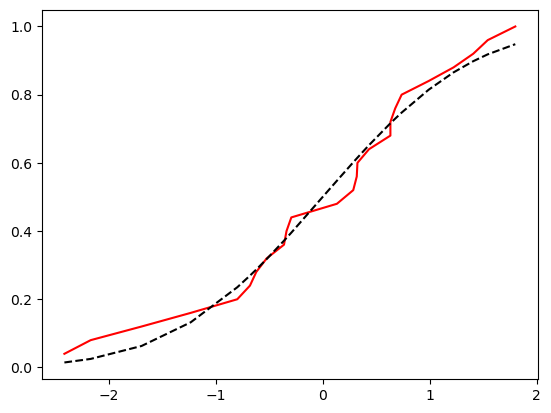

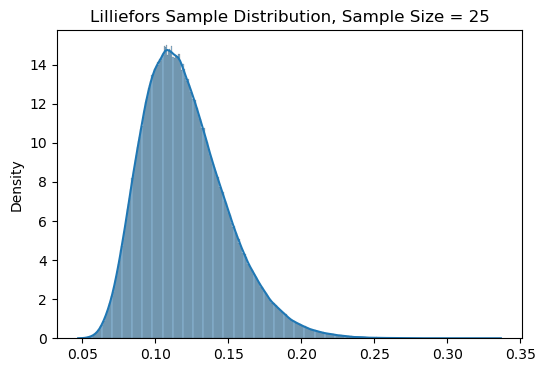

In [30]:
#see cdf and pdf for phi = 0
#use standard normal parameters
#using sample statistics now instead of set mu and sigma
#sample size of 25
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 25
stats_values_lil_25 = [] #array of test statistics for lilliefors with size 10

rejections = []
for i in range(n_trials):
    data = np.sort(rng.normal(size=sample_size));
    #dist = norm estimates from each sample instead of using the known mu and std
    result = lilliefors(data, dist='norm', pvalmethod='table'); #table uses a very large simulation
    pvalue = result[1] #get p-value only of tuple
    stats_values_lil_25.append(result[0])
    rejections.append(pvalue);

emp_cdf = np.arange(1, sample_size + 1) / sample_size
mu_hat = np.mean(data)
sigma_hat = np.std(data, ddof=1)
null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF');
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') ;
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_lil_25, kde=True, stat='density', label='Sample PDF');
plt.title(f'Lilliefors Sample Distribution, Sample Size = {sample_size}');
rejection_rate = np.mean(np.array(rejections) < 0.05);
print(f'Rejection rate: {rejection_rate}');

Rejection rate: 0.050129


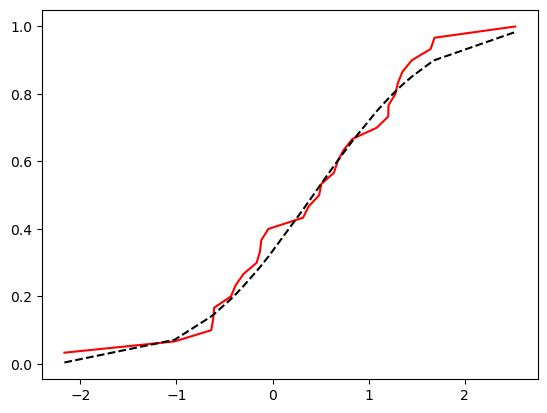

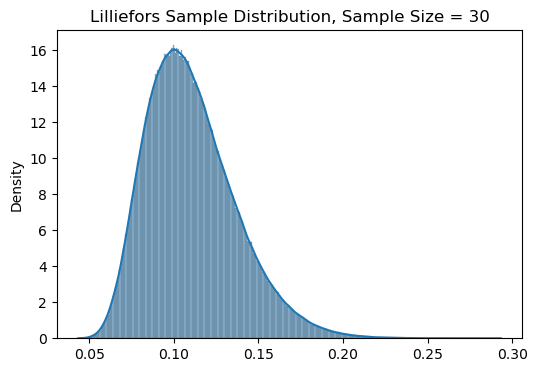

In [31]:
#see cdf and pdf for phi = 0
#use standard normal parameters
#using sample statistics now instead of set mu and sigma
#sample size of 30
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 30
stats_values_lil_30 = [] #array of test statistics for lilliefors with size 10

rejections = []
for i in range(n_trials):
    data = np.sort(rng.normal(size=sample_size));
    #dist = norm estimates from each sample instead of using the known mu and std
    result = lilliefors(data, dist='norm', pvalmethod='table'); #table uses a very large simulation
    pvalue = result[1] #get p-value only of tuple
    stats_values_lil_30.append(result[0])
    rejections.append(pvalue);

emp_cdf = np.arange(1, sample_size + 1) / sample_size
mu_hat = np.mean(data)
sigma_hat = np.std(data, ddof=1)
null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF');
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') ;
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_lil_30, kde=True, stat='density', label='Sample PDF');
plt.title(f'Lilliefors Sample Distribution, Sample Size = {sample_size}');
rejection_rate = np.mean(np.array(rejections) < 0.05);
print(f'Rejection rate: {rejection_rate}');

Rejection rate: 0.049965


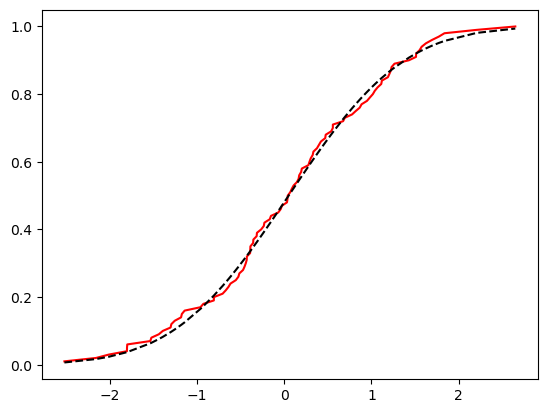

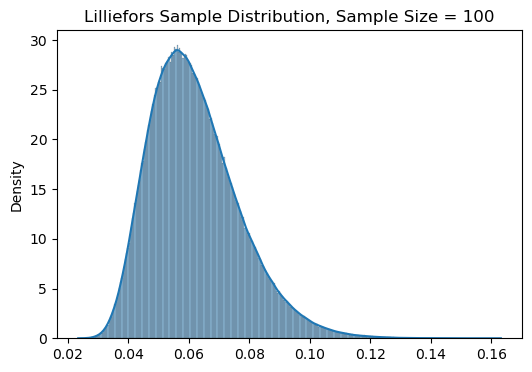

In [42]:
#see cdf and pdf for phi = 0
#use standard normal parameters
#using sample statistics now instead of set mu and sigma
#sample size of 100
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 100
stats_values_lil_100 = [] #array of test statistics for lilliefors with size 10

rejections = []
for i in range(n_trials):
    data = np.sort(rng.normal(size=sample_size));
    #dist = norm estimates from each sample instead of using the known mu and std
    result = lilliefors(data, dist='norm', pvalmethod='table'); #table uses a very large simulation
    pvalue = result[1] #get p-value only of tuple
    stats_values_lil_100.append(result[0])
    rejections.append(pvalue);

emp_cdf = np.arange(1, sample_size + 1) / sample_size
mu_hat = np.mean(data)
sigma_hat = np.std(data, ddof=1)
null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF');
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') ;
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_lil_100, kde=True, stat='density', label='Sample PDF');
plt.title(f'Lilliefors Sample Distribution, Sample Size = {sample_size}');
rejection_rate = np.mean(np.array(rejections) < 0.05);
print(f'Rejection rate: {rejection_rate}');

In [43]:
#save test statistics data to df -> csv for easy retrieval
data = {'stats_values_lil_10' : stats_values_lil_10,
        'stats_values_lil_20' : stats_values_lil_20,
        'stats_values_lil_25' : stats_values_lil_25,
        'stats_values_lil_30' : stats_values_lil_30,
        'stats_values_lil_100' : stats_values_lil_100}
lilliefors_norm_data = pd.DataFrame(data)
#uncorrelated lilliefors test statistics
lilliefors_norm_data.to_csv('lilliefors_norm_data.csv', index=False)

In [44]:
lilliefors_norm_data

,stats_values_lil_10,stats_values_lil_20,stats_values_lil_25,stats_values_lil_30,stats_values_lil_100
0,0.180827,0.110084,0.164938,0.114381,0.069192
1,0.169699,0.087709,0.135680,0.080229,0.074203
2,0.192790,0.129454,0.095387,0.084108,0.045983
3,0.200423,0.101620,0.084889,0.119027,0.051487
4,0.201867,0.116679,0.120189,0.122994,0.060455
...,...,...,...,...,...
999995,0.174667,0.160430,0.151347,0.098820,0.055431
999996,0.149304,0.096489,0.066959,0.153034,0.091459
999997,0.109817,0.083863,0.120848,0.083483,0.048568
999998,0.208199,0.176831,0.111892,0.112003,0.088815


### Autocorrelated Data 

np.float64(0.049713)

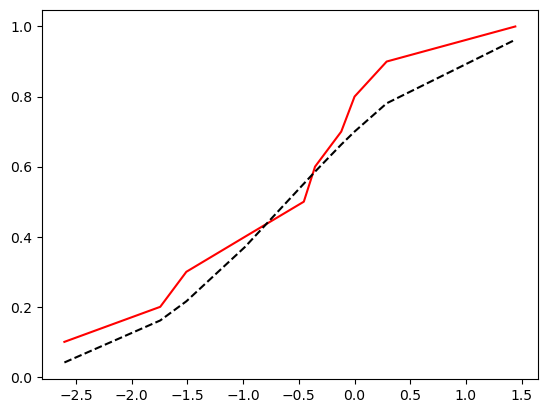

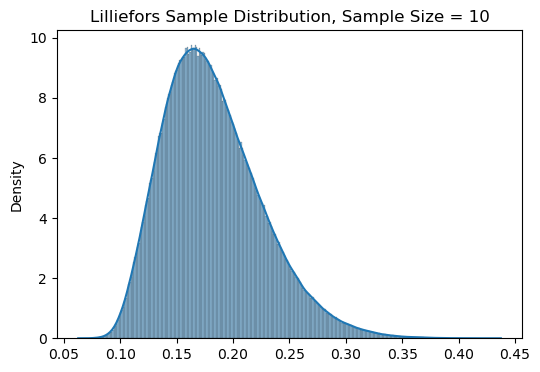

In [45]:
#sample size is 10
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 10
stats_values_lil_10 = [] #array of test statistics for liiliefors with size 10
rejections = []
for i in range(n_trials):
    data = np.sort(generate_ar1(n=sample_size, phi=0.5))
    #dist = norm estimates from each sample instead of using the known mu and std
    result = lilliefors(data, dist='norm', pvalmethod='table') #table uses a very large simulation
    pvalue = result[1] #get p-value only of tuple 
    stats_values_lil_10.append(result[0])
    rejections.append(pvalue)

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF')
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') 
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_lil_10, kde=True, stat='density', label='Sample PDF')
plt.title(f'Lilliefors Sample Distribution, Sample Size = {sample_size}')
rejection_rate = np.mean(np.array(rejections) < 0.05)
rejection_rate

np.float64(0.055298)

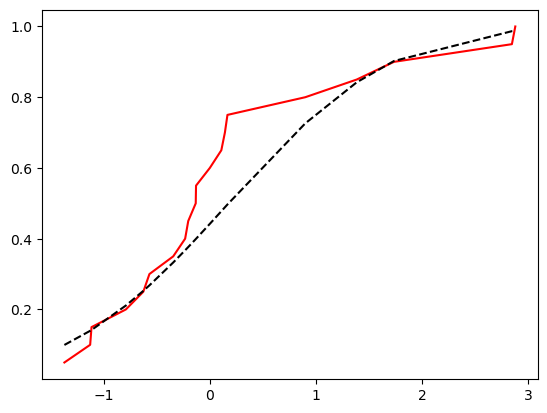

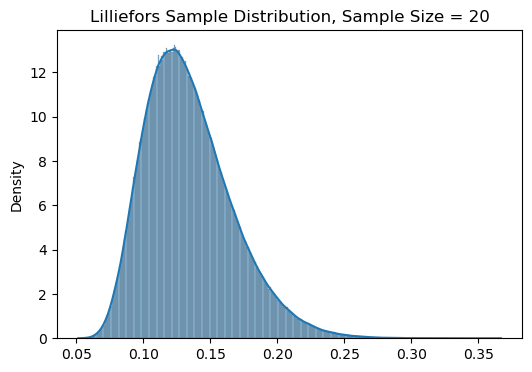

In [46]:
#sample size is 20
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 20
stats_values_lil_20 = [] #array of test statistics for liiliefors with size 20
rejections = []
for i in range(n_trials):
    data = np.sort(generate_ar1(n=sample_size, phi=0.5))
    #dist = norm estimates from each sample instead of using the known mu and std
    result = lilliefors(data, dist='norm', pvalmethod='table') #table uses a very large simulation
    pvalue = result[1] #get p-value only of tuple 
    stats_values_lil_20.append(result[0])
    rejections.append(pvalue)

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF')
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') 
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_lil_20, kde=True, stat='density', label='Sample PDF')
plt.title(f'Lilliefors Sample Distribution, Sample Size = {sample_size}')
rejection_rate = np.mean(np.array(rejections) < 0.05)
rejection_rate

np.float64(0.056294)

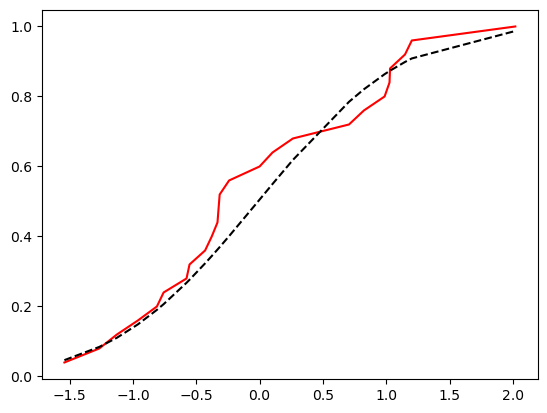

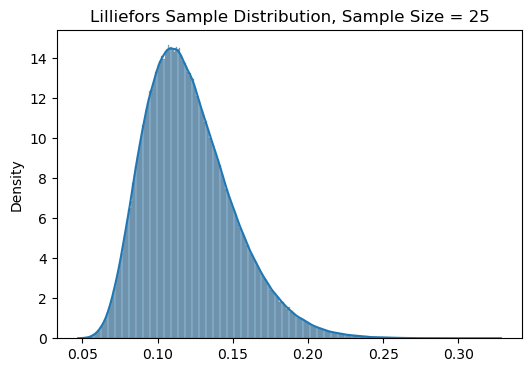

In [47]:
#sample size is 25
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 25
stats_values_lil_25 = [] #array of test statistics for liiliefors with size 25
rejections = []
for i in range(n_trials):
    data = np.sort(generate_ar1(n=sample_size, phi=0.5))
    #dist = norm estimates from each sample instead of using the known mu and std
    result = lilliefors(data, dist='norm', pvalmethod='table') #table uses a very large simulation
    pvalue = result[1] #get p-value only of tuple 
    stats_values_lil_25.append(result[0])
    rejections.append(pvalue)

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF')
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') 
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_lil_25, kde=True, stat='density', label='Sample PDF')
plt.title(f'Lilliefors Sample Distribution, Sample Size = {sample_size}')
rejection_rate = np.mean(np.array(rejections) < 0.05)
rejection_rate

np.float64(0.057809)

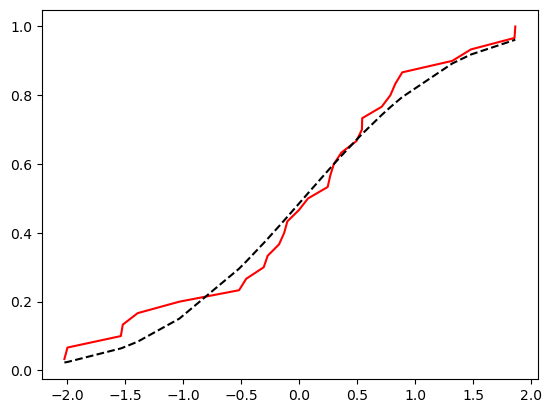

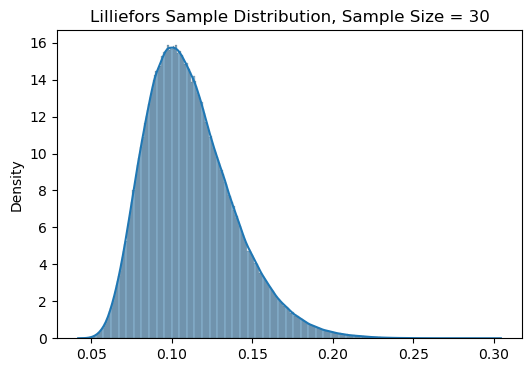

In [48]:
#sample size is 30
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 30
stats_values_lil_30 = [] #array of test statistics for liiliefors with size 30
rejections = []
for i in range(n_trials):
    data = np.sort(generate_ar1(n=sample_size, phi=0.5))
    #dist = norm estimates from each sample instead of using the known mu and std
    result = lilliefors(data, dist='norm', pvalmethod='table') #table uses a very large simulation
    pvalue = result[1] #get p-value only of tuple 
    stats_values_lil_30.append(result[0])
    rejections.append(pvalue)

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF')
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') 
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_lil_30, kde=True, stat='density', label='Sample PDF')
plt.title(f'Lilliefors Sample Distribution, Sample Size = {sample_size}')
rejection_rate = np.mean(np.array(rejections) < 0.05)
rejection_rate

np.float64(0.062032)

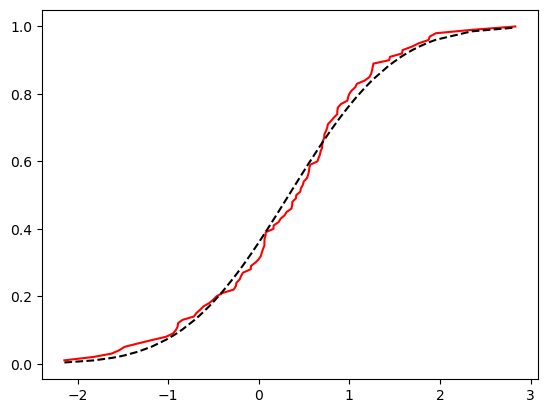

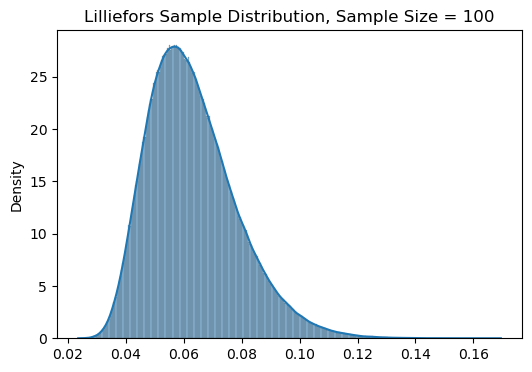

In [49]:
#sample size is 100
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 100
stats_values_lil_100 = [] #array of test statistics for liiliefors with size 10
rejections = []
for i in range(n_trials):
    data = np.sort(generate_ar1(n=sample_size, phi=0.5))
    #dist = norm estimates from each sample instead of using the known mu and std
    result = lilliefors(data, dist='norm', pvalmethod='table') #table uses a very large simulation
    pvalue = result[1] #get p-value only of tuple 
    stats_values_lil_100.append(result[0])
    rejections.append(pvalue)

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF')
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') 
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_lil_100, kde=True, stat='density', label='Sample PDF')
plt.title(f'Lilliefors Sample Distribution, Sample Size = {sample_size}')
rejection_rate = np.mean(np.array(rejections) < 0.05)
rejection_rate

In [50]:
#save data to df -> csv
data = {'stats_values_lil_10': stats_values_lil_10,
        'stats_values_lil_20': stats_values_lil_20,
        'stats_values_lil_25': stats_values_lil_25,
        'stats_values_lil_30': stats_values_lil_30,
        'stats_values_lil_100': stats_values_lil_100}
lilliefors_correlated_data = pd.DataFrame(data)
#correlated lilliefors test statistics
lilliefors_correlated_data.to_csv('lilliefors_correlated_data.csv', index=False)

In [51]:
lilliefors_correlated_data

,stats_values_lil_10,stats_values_lil_20,stats_values_lil_25,stats_values_lil_30,stats_values_lil_100
0,0.209858,0.108835,0.136970,0.080300,0.078410
1,0.129814,0.104772,0.149300,0.109201,0.081311
2,0.157702,0.115929,0.152859,0.084268,0.096101
3,0.159391,0.213829,0.146302,0.086029,0.071967
4,0.311358,0.072892,0.065287,0.099534,0.077070
...,...,...,...,...,...
999995,0.127892,0.114509,0.135957,0.096230,0.051190
999996,0.136539,0.096051,0.066295,0.113944,0.080734
999997,0.165000,0.157309,0.091577,0.151500,0.064005
999998,0.225109,0.138185,0.185181,0.062643,0.072752


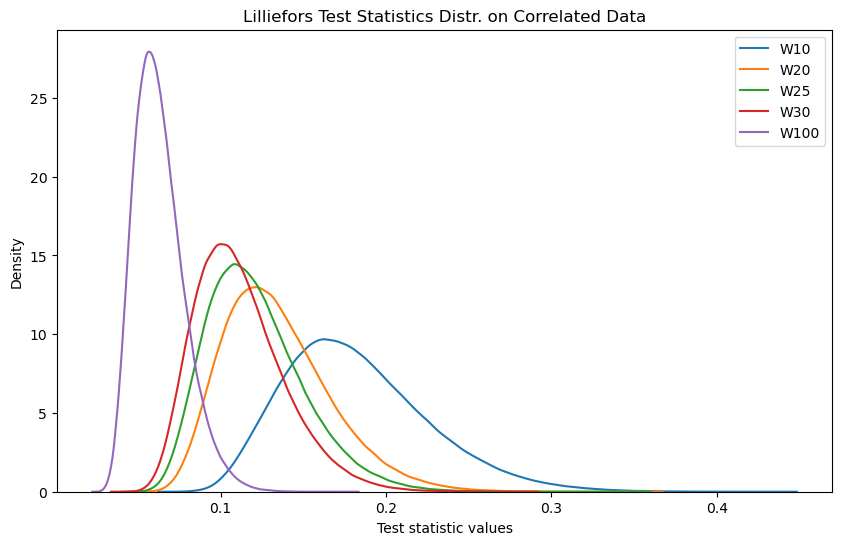

In [52]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.kdeplot(lilliefors_correlated_data['stats_values_lil_10'], label = 'W10')
sns.kdeplot(lilliefors_correlated_data['stats_values_lil_20'], label = 'W20')
sns.kdeplot(lilliefors_correlated_data['stats_values_lil_25'], label = 'W25')
sns.kdeplot(lilliefors_correlated_data['stats_values_lil_30'], label = 'W30')
sns.kdeplot(lilliefors_correlated_data['stats_values_lil_100'], label = 'W100')
plt.title('Lilliefors Test Statistics Distr. on Correlated Data')
plt.xlabel('Test statistic values')
plt.legend();

In [53]:
#making autocorrelation plot with different phi's, sample size n, differerent type I error
phi_vals = np.arange(0,1.1,0.1)
mu, sigma = 0, 1
n_trials = 1000000
sample_size = 100

rejection_rates = []
for i in range(len(phi_vals)):
    rejections = []
    for j in range(n_trials):
        data = generate_ar1(n = sample_size, phi = phi_vals[i])
        result = lilliefors(data, dist='norm', pvalmethod='table')
        pvalue = result[1] #get p-value only of tuple 
        rejections.append(pvalue)
    rejection_rate = np.mean(np.array(rejections) < 0.05)
    rejection_rates.append(rejection_rate)

In [54]:
rejection_rates

[np.float64(0.049957),
 np.float64(0.049823),
 np.float64(0.050801),
 np.float64(0.052098),
 np.float64(0.055441),
 np.float64(0.062321),
 np.float64(0.076117),
 np.float64(0.102581),
 np.float64(0.160913),
 np.float64(0.299277),
 np.float64(0.686231)]

In [56]:
lilliefors_rejection_rates_df = pd.DataFrame(rejection_rates)
lilliefors_rejection_rates_df = lilliefors_rejection_rates_df.set_axis(['Rejection Rates'], axis=1)
lilliefors_rejection_rates_df['Phi Values'] = phi_vals
lilliefors_rejection_rates_df.to_csv('lilliefors_ar1_reject_rates.csv', index=False)
lilliefors_rejection_rates_df

,Rejection Rates,Phi Values
0,0.049957,0.0
1,0.049823,0.1
2,0.050801,0.2
3,0.052098,0.3
4,0.055441,0.4
5,0.062321,0.5
6,0.076117,0.6
7,0.102581,0.7
8,0.160913,0.8
9,0.299277,0.9


In [44]:
#read csv file in for data
lilliefors_norm_data_df = pd.read_csv('lilliefors_norm_data.csv')
lilliefors_correlated_data_df = pd.read_csv('lilliefors_correlated_data.csv')
lilliefors_correlated_data_df.head()

,stats_values_lil_10,stats_values_lil_20,stats_values_lil_25,stats_values_lil_30,stats_values_lil_100
0,0.209858,0.108835,0.136970,0.080300,0.078410
1,0.129814,0.104772,0.149300,0.109201,0.081311
2,0.157702,0.115929,0.152859,0.084268,0.096101
3,0.159391,0.213829,0.146302,0.086029,0.071967
4,0.311358,0.072892,0.065287,0.099534,0.077070


np.float64(0.051054)

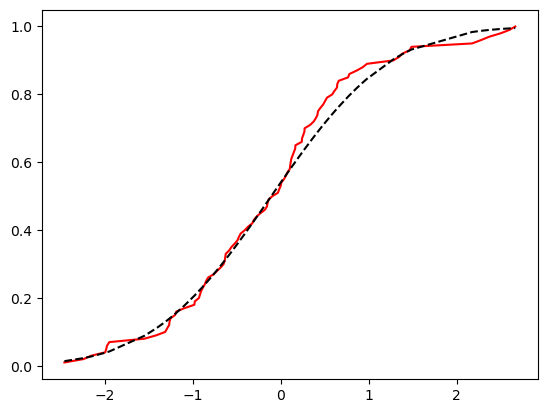

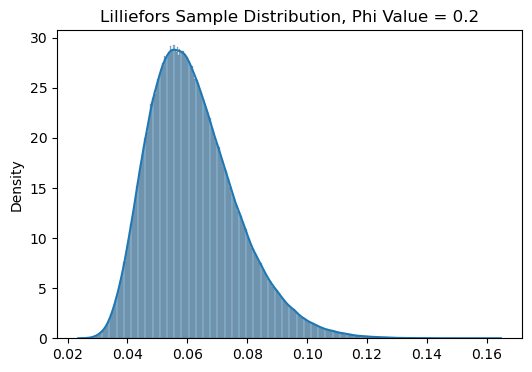

In [47]:
#sample size is 100
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 100
stats_values_phi_1 = [] #array of test statistics for liiliefors with size 10
rejections = []
phi_val = 0.2

for i in range(n_trials):
    data = np.sort(generate_ar1(n=sample_size, phi=phi_val))
    #dist = norm estimates from each sample instead of using the known mu and std
    result = lilliefors(data, dist='norm', pvalmethod='table') #table uses a very large simulation
    pvalue = result[1] #get p-value only of tuple 
    stats_values_phi_1.append(result[0])
    rejections.append(pvalue)

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF')
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') 
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_phi_1, kde=True, stat='density', label='Sample PDF')
plt.title(f'Lilliefors Sample Distribution, Phi Value = {phi_val}')
rejection_rate = np.mean(np.array(rejections) < 0.05)
rejection_rate

np.float64(0.055685)

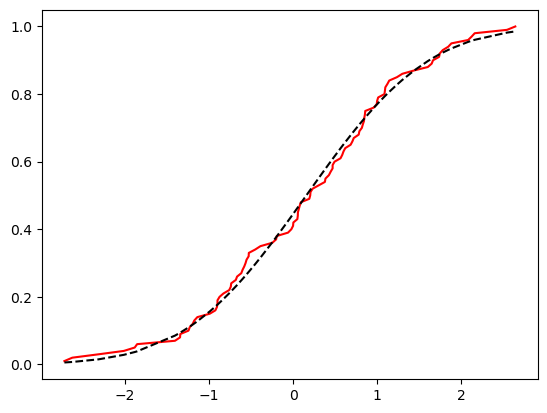

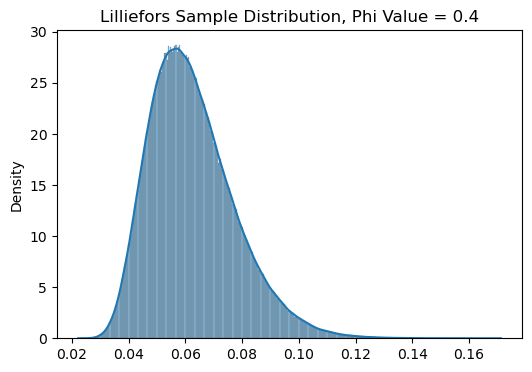

In [48]:
#sample size is 100
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 100
stats_values_phi_2 = [] #array of test statistics for liiliefors with size 10
rejections = []
phi_val = 0.4

for i in range(n_trials):
    data = np.sort(generate_ar1(n=sample_size, phi=phi_val))
    #dist = norm estimates from each sample instead of using the known mu and std
    result = lilliefors(data, dist='norm', pvalmethod='table') #table uses a very large simulation
    pvalue = result[1] #get p-value only of tuple 
    stats_values_phi_2.append(result[0])
    rejections.append(pvalue)

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF')
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') 
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_phi_2, kde=True, stat='density', label='Sample PDF')
plt.title(f'Lilliefors Sample Distribution, Phi Value = {phi_val}')
rejection_rate = np.mean(np.array(rejections) < 0.05)
rejection_rate

np.float64(0.161155)

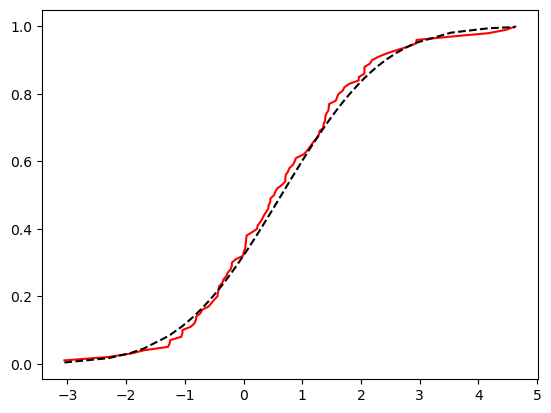

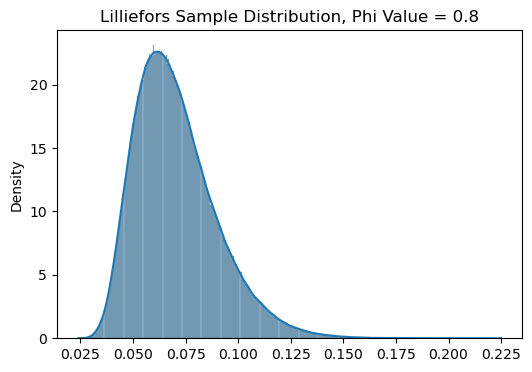

In [49]:
#sample size is 100
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 100
stats_values_phi_3 = [] #array of test statistics for liiliefors with size 10
rejections = []
phi_val = 0.8

for i in range(n_trials):
    data = np.sort(generate_ar1(n=sample_size, phi=phi_val))
    #dist = norm estimates from each sample instead of using the known mu and std
    result = lilliefors(data, dist='norm', pvalmethod='table') #table uses a very large simulation
    pvalue = result[1] #get p-value only of tuple 
    stats_values_phi_3.append(result[0])
    rejections.append(pvalue)

    emp_cdf = np.arange(1, sample_size + 1) / sample_size
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    null_cdf = stats.norm.cdf(data, loc=mu_hat, scale=sigma_hat)
plt.plot(data, emp_cdf, 'r-', label='Empirical CDF')
plt.plot(data, null_cdf, 'k--', label='Fitted Normal CDF') 
plt.figure(figsize=(6, 4))
sns.histplot(stats_values_phi_3, kde=True, stat='density', label='Sample PDF')
plt.title(f'Lilliefors Sample Distribution, Phi Value = {phi_val}')
rejection_rate = np.mean(np.array(rejections) < 0.05)
rejection_rate

In [52]:
#save data to df -> csv
data = {'stats_values_phi_1': stats_values_phi_1,
        'stats_values_phi_2': stats_values_phi_2,
        'stats_values_phi_3': stats_values_phi_3}
lilliefors_correlated_phi_data = pd.DataFrame(data)
#correlated lilliefors test statistics
lilliefors_correlated_phi_data.to_csv('lilliefors_correlated_phi_data.csv', index=False)
lilliefors_correlated_phi_data

,stats_values_phi_1,stats_values_phi_2,stats_values_phi_3
0,0.051990,0.101232,0.124382
1,0.060703,0.057419,0.064414
2,0.047232,0.090165,0.066394
3,0.051842,0.057495,0.063249
4,0.058459,0.083908,0.114826
...,...,...,...
999995,0.066721,0.076472,0.081601
999996,0.042425,0.058842,0.077771
999997,0.056272,0.048775,0.075126
999998,0.092013,0.066962,0.096004


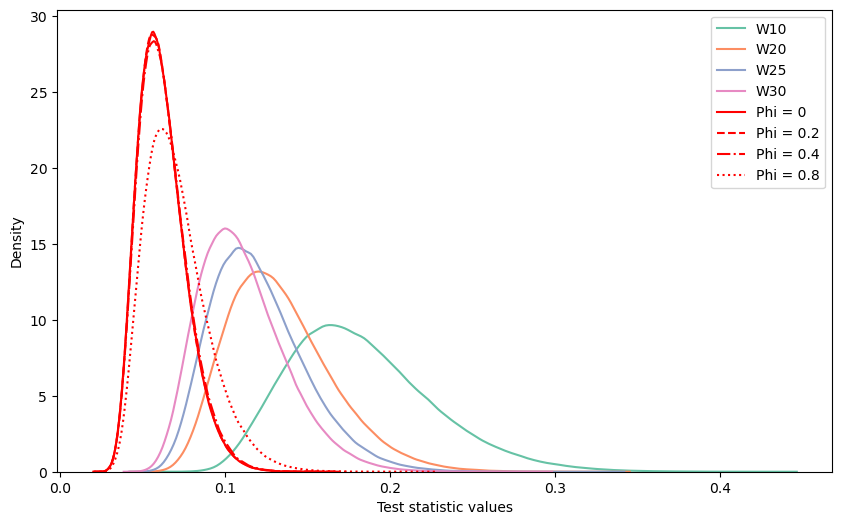

In [73]:
fig, ax = plt.subplots(figsize = (10, 6))
palette = sns.color_palette("Set2", 5)
norm_columns = ['stats_values_lil_10', 'stats_values_lil_20', 'stats_values_lil_25', 'stats_values_lil_30']
labels = ['W10', 'W20', 'W25', 'W30']

#normal data
for i, (col, label) in enumerate(zip(columns, labels)): #zip is to tie each column to the right label in the plot
    sns.kdeplot(lilliefors_norm_data_df[col], label=label, color=palette[i])

#correlated data
sns.kdeplot(lilliefors_norm_data_df['stats_values_lil_100'], label='Phi = 0', linestyle='-', color='red')
sns.kdeplot(lilliefors_correlated_phi_data['stats_values_phi_1'], label='Phi = 0.2', linestyle='--', color='red')
sns.kdeplot(lilliefors_correlated_phi_data['stats_values_phi_2'], label='Phi = 0.4', linestyle='-.', color='red')
sns.kdeplot(lilliefors_correlated_phi_data['stats_values_phi_3'], label='Phi = 0.8', linestyle=':', color='red')
    
plt.legend()
plt.xlabel('Test statistic values')
plt.legend();

## Shapiro-Wilks Test

### Normal Data (uncorrelated)

Rejection_rate: 0.04943


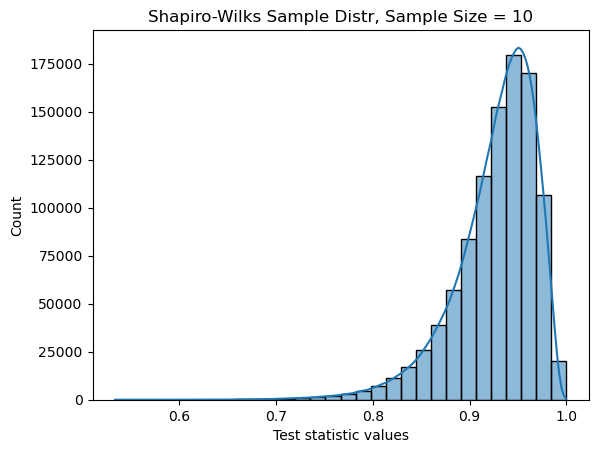

In [55]:
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 10
stats_values_10 = []

rejections = []
for i in range(n_trials):
    data = rng.normal(size=sample_size)
    result = stats.shapiro(data)
    stat, pval = stats.shapiro(data)
    stats_values_10.append(stat)
    rejections.append(pval)

stats_values_10 = np.array(stats_values_10)
rejection_rate = np.mean(np.array(rejections) < 0.05)
hist_10 = sns.histplot(stats_values_10, bins=30, kde=True, edgecolor='black')
plt.xlabel('Test statistic values')
plt.title(f'Shapiro-Wilks Sample Distr, Sample Size = {sample_size}')
print(f'Rejection_rate: {rejection_rate}')

Rejection_rate: 0.050217


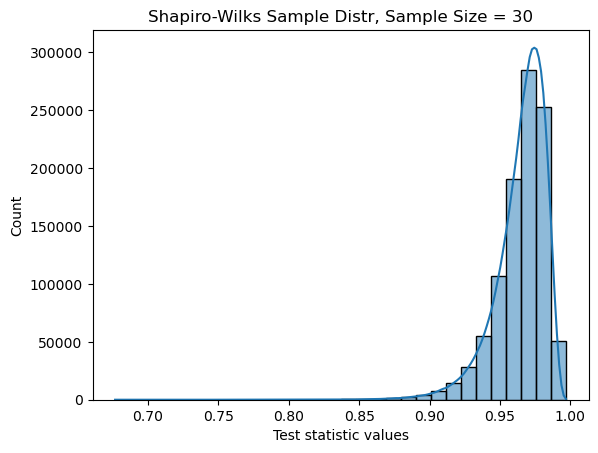

In [56]:
#sample size = 30
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 30
stats_values_30 = []

rejections = []
for i in range(n_trials):
    data = rng.normal(size=sample_size)
    result = stats.shapiro(data)
    stat, pval = stats.shapiro(data)
    stats_values_30.append(stat)
    rejections.append(pval)

stats_values_30 = np.array(stats_values_30)
rejection_rate = np.mean(np.array(rejections) < 0.05)
hist_30 = sns.histplot(stats_values_30, bins=30, kde=True, edgecolor='black')
plt.xlabel('Test statistic values')
plt.title(f'Shapiro-Wilks Sample Distr, Sample Size = {sample_size}')
print(f'Rejection_rate: {rejection_rate}')

Rejection_rate: 0.050003


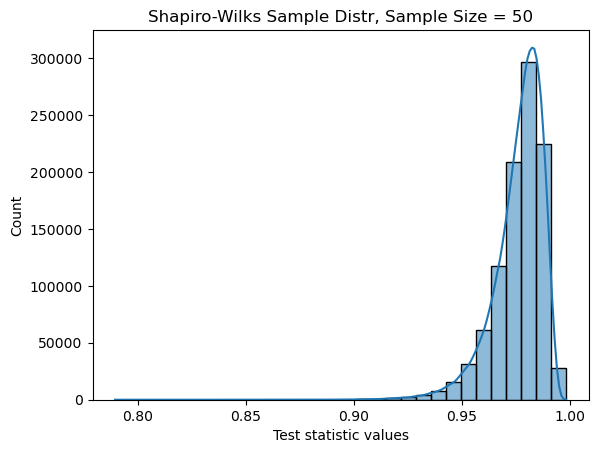

In [57]:
#sample size is 50
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 50
stats_values_50 = []

rejections = []
for i in range(n_trials):
    data = rng.normal(size=sample_size)
    result = stats.shapiro(data)
    stat, pval = stats.shapiro(data)
    stats_values_50.append(stat)
    rejections.append(pval)

stats_values_50 = np.array(stats_values_50)
rejection_rate = np.mean(np.array(rejections) < 0.05)
hist_50 = sns.histplot(stats_values_50, bins=30, kde=True, edgecolor='black')
plt.xlabel('Test statistic values')
plt.title(f'Shapiro-Wilks Sample Distr, Sample Size = {sample_size}')
print(f'Rejection_rate: {rejection_rate}')

Rejection_rate: 0.04928


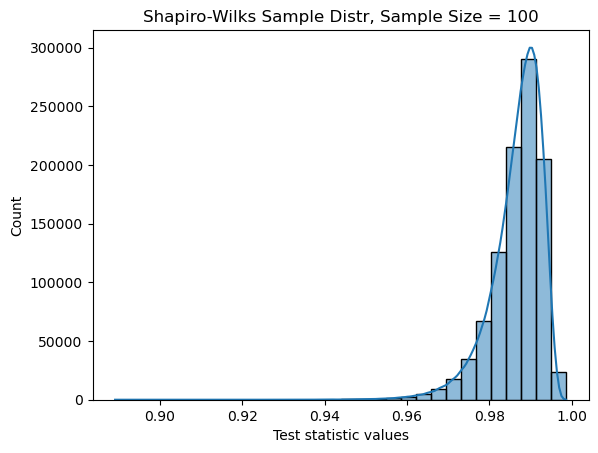

In [58]:
#sample size is 100
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 100
stats_values_100 = []

rejections = []
for i in range(n_trials):
    data = rng.normal(size=sample_size)
    result = stats.shapiro(data)
    stat, pval = stats.shapiro(data)
    stats_values_100.append(stat)
    rejections.append(pval)

stats_values_100 = np.array(stats_values_100)
rejection_rate = np.mean(np.array(rejections) < 0.05)
hist_100 = sns.histplot(stats_values_100, bins=30, kde=True, edgecolor='black')
plt.xlabel('Test statistic values')
plt.title(f'Shapiro-Wilks Sample Distr, Sample Size = {sample_size}')
print(f'Rejection_rate: {rejection_rate}')

Rejection_rate: 0.049477


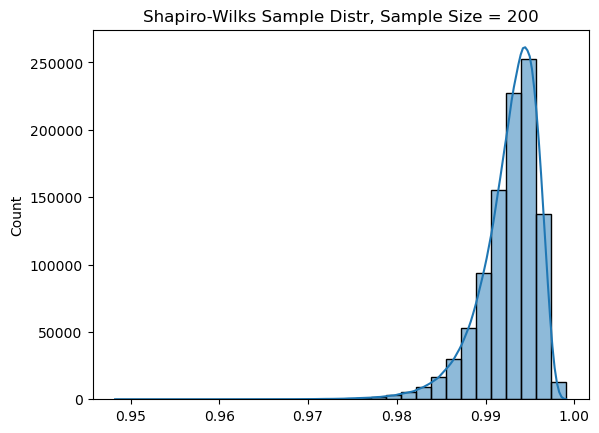

In [59]:
#sample size is 200
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 200
stats_values_200 = []

rejections = []
for i in range(n_trials):
    data = rng.normal(size=sample_size)
    result = stats.shapiro(data)
    stat, pval = stats.shapiro(data)
    stats_values_200.append(stat)
    rejections.append(pval)

stats_values_200 = np.array(stats_values_200)
rejection_rate = np.mean(np.array(rejections) < 0.05)
hist_200 = sns.histplot(stats_values_200, bins=30, kde=True, edgecolor='black')
plt.title(f'Shapiro-Wilks Sample Distr, Sample Size = {sample_size}')
print(f'Rejection_rate: {rejection_rate}')

In [61]:
#save data to df -> csv
data = {'stats_values_10': stats_values_10,
        'stats_values_30': stats_values_30,
        'stats_values_50': stats_values_50,
        'stats_values_100': stats_values_100,
        'stats_values_200': stats_values_200}
shapiro_normal_data = pd.DataFrame(data)
#correlated lilliefors test statistics
shapiro_normal_data.to_csv('shapiro_normal_data.csv', index=False)

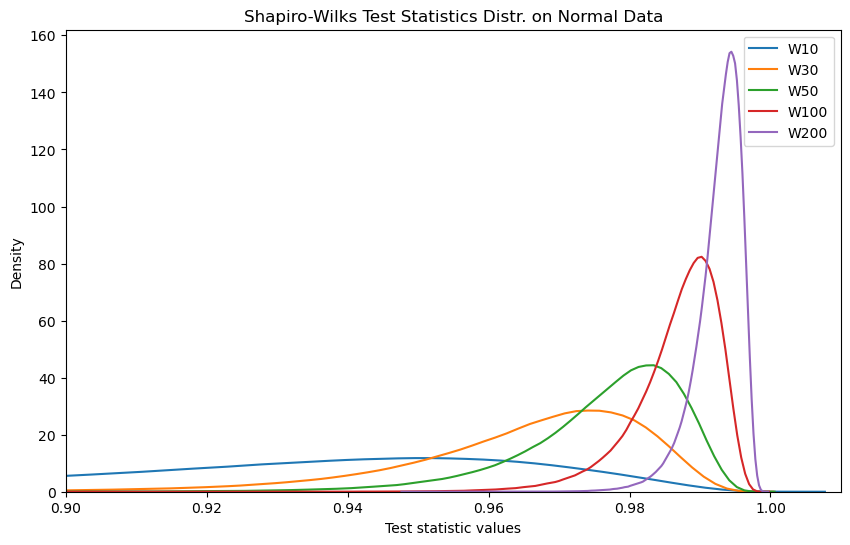

In [68]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.kdeplot(shapiro_normal_data['stats_values_10'], label = 'W10')
sns.kdeplot(shapiro_normal_data['stats_values_30'], label = 'W30')
sns.kdeplot(shapiro_normal_data['stats_values_50'], label = 'W50')
sns.kdeplot(shapiro_normal_data['stats_values_100'], label = 'W100')
sns.kdeplot(shapiro_normal_data['stats_values_200'], label = 'W200')
ax.set_xlim(0.9, 1.01); plt.title('Shapiro-Wilks Test Statistics Distr. on Normal Data')
plt.xlabel('Test statistic values')
plt.legend();

### Autocorrelated Data

Rejection_rate: 0.050435


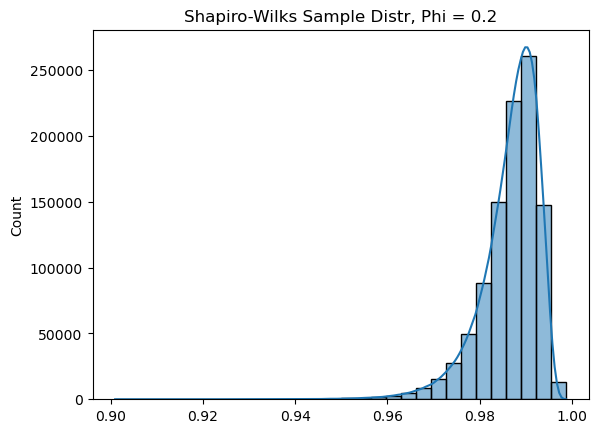

In [63]:
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 100
stats_values_phi_1 = []
phi_val = 0.2

rejections = []
for i in range(n_trials):
    data = generate_ar1(sample_size, phi=phi_val)
    result = stats.shapiro(data)
    stat, pval = stats.shapiro(data)
    stats_values_phi_1.append(stat)
    rejections.append(pval)

stats_values_phi_1 = np.array(stats_values_phi_1)
rejection_rate = np.mean(np.array(rejections) < 0.05)
sns.histplot(stats_values_phi_1, bins=30, kde=True, edgecolor='black')
plt.title(f'Shapiro-Wilks Sample Distr, Phi = {phi_val}')
print(f'Rejection_rate: {rejection_rate}')

Rejection_rate: 0.057922


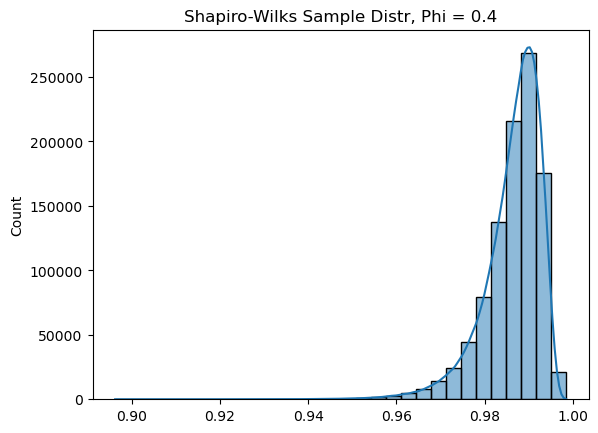

In [64]:
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 100
stats_values_phi_2 = []
phi_val = 0.4

rejections = []
for i in range(n_trials):
    data = generate_ar1(sample_size, phi=phi_val)
    result = stats.shapiro(data)
    stat, pval = stats.shapiro(data)
    stats_values_phi_2.append(stat)
    rejections.append(pval)

stats_values_phi_2 = np.array(stats_values_phi_2)
rejection_rate = np.mean(np.array(rejections) < 0.05)
sns.histplot(stats_values_phi_2, bins=30, kde=True, edgecolor='black')
plt.title(f'Shapiro-Wilks Sample Distr, Phi = {phi_val}')
print(f'Rejection_rate: {rejection_rate}')

Rejection_rate: 0.089585


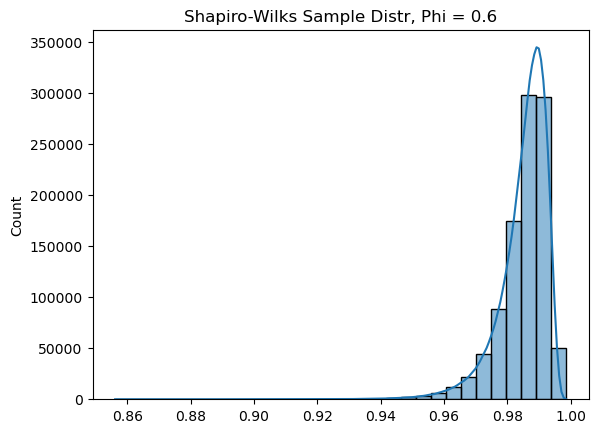

In [65]:
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 100
stats_values_phi_3 = []
phi_val = 0.6

rejections = []
for i in range(n_trials):
    data = generate_ar1(sample_size, phi=phi_val)
    result = stats.shapiro(data)
    stat, pval = stats.shapiro(data)
    stats_values_phi_3.append(stat)
    rejections.append(pval)

stats_values_phi_3 = np.array(stats_values_phi_3)
rejection_rate = np.mean(np.array(rejections) < 0.05)
sns.histplot(stats_values_phi_3, bins=30, kde=True, edgecolor='black')
plt.title(f'Shapiro-Wilks Sample Distr, Phi = {phi_val}')
print(f'Rejection_rate: {rejection_rate}')

Rejection_rate: 0.211484


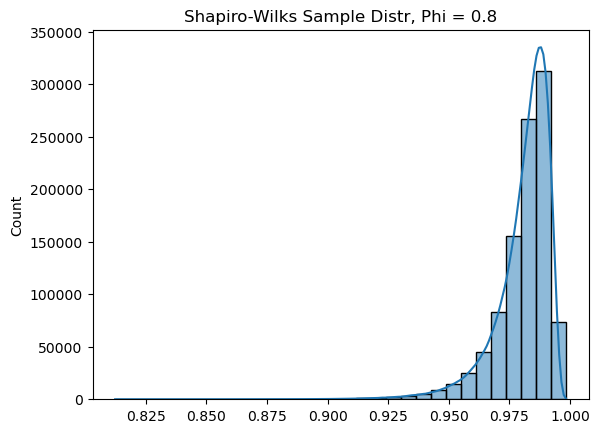

In [66]:
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 100
stats_values_phi_4 = []
phi_val = 0.8

rejections = []
for i in range(n_trials):
    data = generate_ar1(sample_size, phi=phi_val)
    result = stats.shapiro(data)
    stat, pval = stats.shapiro(data)
    stats_values_phi_4.append(stat)
    rejections.append(pval)

stats_values_phi_4 = np.array(stats_values_phi_4)
rejection_rate = np.mean(np.array(rejections) < 0.05)
sns.histplot(stats_values_phi_4, bins=30, kde=True, edgecolor='black')
plt.title(f'Shapiro-Wilks Sample Distr, Phi = {phi_val}')
print(f'Rejection_rate: {rejection_rate}')

In [69]:
#save data to df -> csv
data = {'stats_values_phi_0': stats_values_100,
        'stats_values_phi_1': stats_values_phi_1,
        'stats_values_phi_2': stats_values_phi_2,
        'stats_values_phi_3': stats_values_phi_3,
        'stats_values_phi_4': stats_values_phi_4,
        'stats_values_200': stats_values_200}
shapiro_correlated_data = pd.DataFrame(data)
#correlated lilliefors test statistics
shapiro_correlated_data.to_csv('shapiro_correlated_data.csv', index=False)

In [70]:
shapiro_correlated_data

,stats_values_phi_0,stats_values_phi_1,stats_values_phi_2,stats_values_phi_3,stats_values_phi_4,stats_values_200
0,0.977625,0.989090,0.991388,0.992617,0.991678,0.990757
1,0.993878,0.971484,0.986030,0.994357,0.978941,0.993771
2,0.972802,0.991766,0.980189,0.986854,0.993718,0.993735
3,0.984762,0.989408,0.991662,0.965585,0.972823,0.993013
4,0.984112,0.981419,0.988485,0.964788,0.982292,0.991568
...,...,...,...,...,...,...
999995,0.989176,0.991780,0.991080,0.994292,0.981610,0.991253
999996,0.990012,0.991574,0.985892,0.991031,0.993801,0.992933
999997,0.988283,0.985338,0.994767,0.969472,0.997692,0.987601
999998,0.983535,0.994090,0.989735,0.987627,0.990545,0.983918


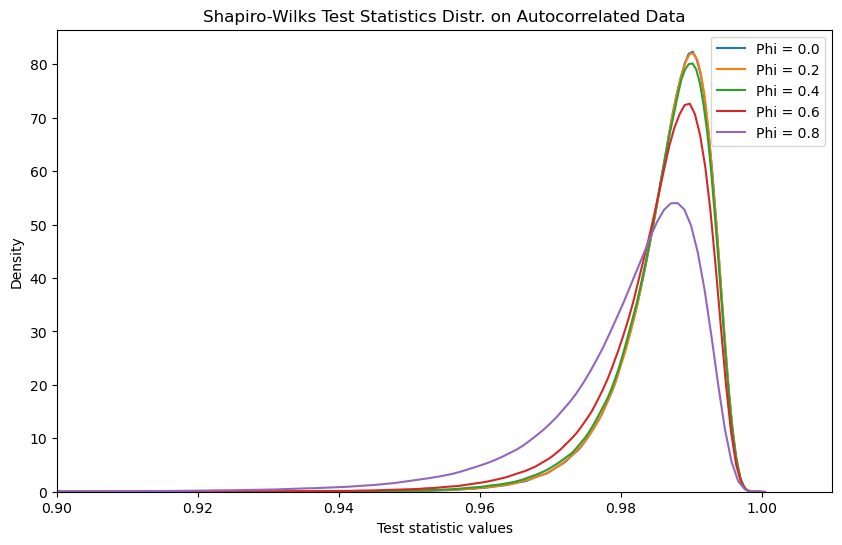

In [73]:
#Shapiro-Wilks plot for 
fig, ax = plt.subplots(figsize = (10, 6))
sns.kdeplot(shapiro_correlated_data['stats_values_phi_0'], label = 'Phi = 0.0')
sns.kdeplot(shapiro_correlated_data['stats_values_phi_1'], label = 'Phi = 0.2')
sns.kdeplot(shapiro_correlated_data['stats_values_phi_2'], label = 'Phi = 0.4')
sns.kdeplot(shapiro_correlated_data['stats_values_phi_3'], label = 'Phi = 0.6')
sns.kdeplot(shapiro_correlated_data['stats_values_phi_4'], label = 'Phi = 0.8')
ax.set_xlabel('Test statistic values')
ax.set_xlim(0.9, 1.01); plt.title('Shapiro-Wilks Test Statistics Distr. on Autocorrelated Data')
plt.legend();

In [6]:
#making autocorrelation plot with different phi's, sample size n, differerent type I error
phi_vals = np.arange(0,1.1,0.1)
mu, sigma = 0, 1
n_trials = 1000000
sample_size = 100

rejection_rates = []
for i in range(len(phi_vals)):
    rejections = []
    for j in range(n_trials):
        data = generate_ar1(n = sample_size, phi = phi_vals[i])
        result = stats.shapiro(data)
        pvalue = result[1] #get p-value only of tuple 
        rejections.append(pvalue)
    rejection_rate = np.mean(np.array(rejections) < 0.05)
    rejection_rates.append(rejection_rate)

In [7]:
rejection_rates

[np.float64(0.050011),
 np.float64(0.050422),
 np.float64(0.050474),
 np.float64(0.053149),
 np.float64(0.057923),
 np.float64(0.068523),
 np.float64(0.08856),
 np.float64(0.128519),
 np.float64(0.212159),
 np.float64(0.39922),
 np.float64(0.802679)]

In [14]:
shapiro_rejection_rates_df = pd.DataFrame(rejection_rates)
shapiro_rejection_rates_df = shapiro_rejection_rates_df.set_axis(['Rejection Rates'], axis=1)
shapiro_rejection_rates_df['Phi Values'] = phi_vals
shapiro_rejection_rates_df.to_csv('shapiro_ar1_reject_rates.csv', index=False)
shapiro_rejection_rates_df

,Rejection Rates,Phi Values
0,0.050011,0.0
1,0.050422,0.1
2,0.050474,0.2
3,0.053149,0.3
4,0.057923,0.4
5,0.068523,0.5
6,0.088560,0.6
7,0.128519,0.7
8,0.212159,0.8
9,0.399220,0.9


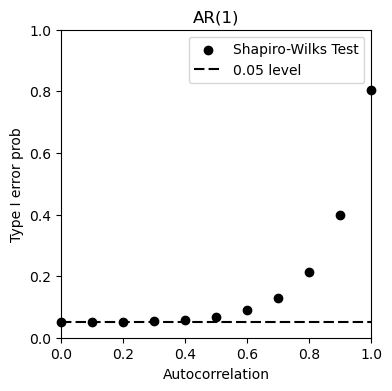

In [16]:
fig, ax = plt.subplots(figsize = (4,4))
plt.scatter(shapiro_rejection_rates_df['Phi Values'], shapiro_rejection_rates_df['Rejection Rates'], color = 'black', clip_on=False, label='Shapiro-Wilks Test'); #show points on axes
plt.xticks(np.arange(0, 1.2, 0.2)); plt.yticks(np.arange(0, 1.2, 0.2)); 
plt.xlim(0, 1.0); plt.ylim(0, 1.0); #make plot look nicer
plt.axhline(y=0.05, color = 'k', linestyle='--', dashes = (5,2), label = '0.05 level');
ax.legend()
plt.xlabel('Autocorrelation'); plt.ylabel('Type I error prob'); plt.title('AR(1)');

## Anderson Darling

### Normal Data

Rejection_rate: 0.05065


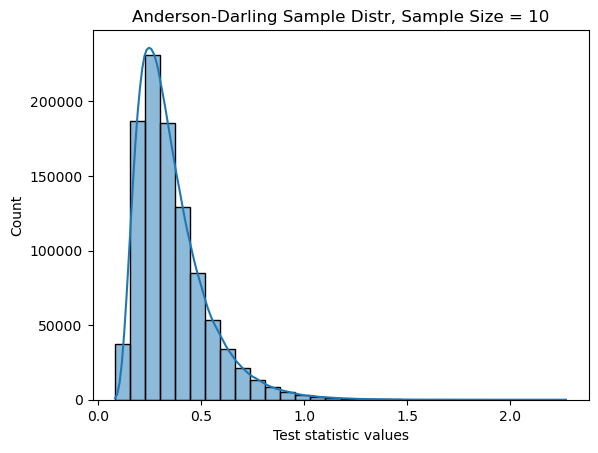

In [25]:
#sample size = 10
rng = np.random.default_rng() #default is mu = 0, std = 1
n_trials = 1000000
sample_size = 10

AD_stats_10 = []
rejections = []
for i in range(n_trials):
    data = rng.normal(size=sample_size)
    result = stats.anderson(data, dist='norm')
    #does not return p-value in fn 
    stat = result.statistic
    AD_stats_10.append(stat)
    crit_vals = result.critical_values
    sig_levels = result.significance_level/100
    reject = stat > crit_vals[sig_levels.tolist().index(0.05)]
    rejections.append(reject)
    
rejection_rate = np.mean(rejections)

sns.histplot(AD_stats_10, bins=30, kde=True, edgecolor='black')
plt.xlabel('Test statistic values'); plt.title(f'Anderson-Darling Sample Distr, Sample Size = {sample_size}')
print(f'Rejection_rate: {rejection_rate}')

Rejection_rate: 0.056275


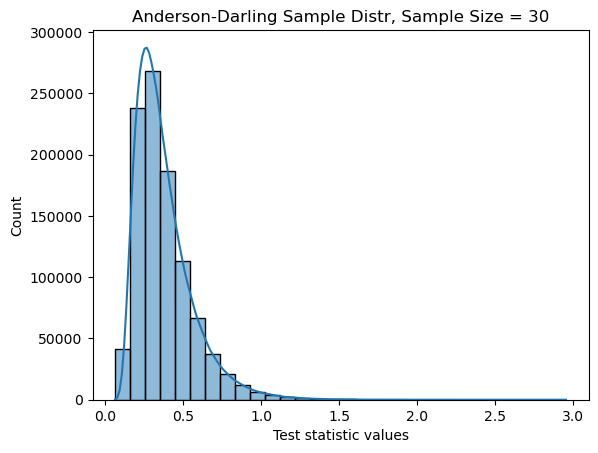

In [26]:
#sample size = 30
rng = np.random.default_rng()
n_trials = 1000000
sample_size = 30

AD_stats_30 = []
rejections = []
for i in range(n_trials):
    data = rng.normal(size=sample_size)
    result = stats.anderson(data, dist='norm')
    #does not return p-value in fn 
    stat = result.statistic
    AD_stats_30.append(stat)
    crit_vals = result.critical_values
    sig_levels = result.significance_level/100
    reject = stat > crit_vals[sig_levels.tolist().index(0.05)]
    rejections.append(reject)
    
rejection_rate = np.mean(rejections)

sns.histplot(AD_stats_30, bins=30, kde=True, edgecolor='black')
plt.xlabel('Test statistic values'); plt.title(f'Anderson-Darling Sample Distr, Sample Size = {sample_size}')
print(f'Rejection_rate: {rejection_rate}')

Rejection_rate: 0.051701


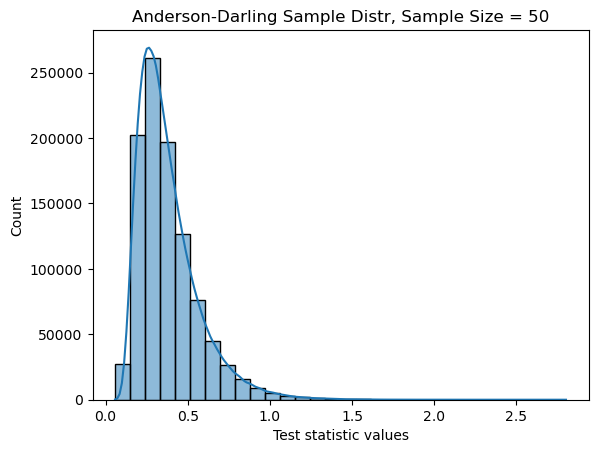

In [27]:
#sample size = 50
rng = np.random.default_rng()
n_trials = 1000000
sample_size = 50

AD_stats_50 = []
rejections = []
for i in range(n_trials):
    data = rng.normal(size=sample_size)
    result = stats.anderson(data, dist='norm')
    #does not return p-value in fn 
    stat = result.statistic
    AD_stats_50.append(stat)
    crit_vals = result.critical_values
    sig_levels = result.significance_level/100
    reject = stat > crit_vals[sig_levels.tolist().index(0.05)]
    rejections.append(reject)
    
rejection_rate = np.mean(rejections)

sns.histplot(AD_stats_50, bins=30, kde=True, edgecolor='black')
plt.xlabel('Test statistic values'); plt.title(f'Anderson-Darling Sample Distr, Sample Size = {sample_size}')
print(f'Rejection_rate: {rejection_rate}')

Rejection_rate: 0.046492


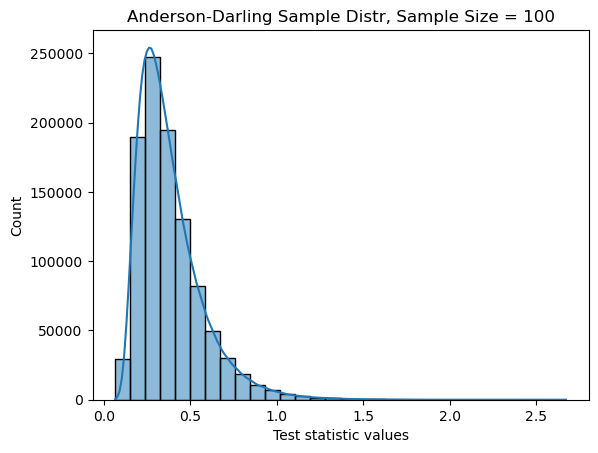

In [28]:
#sample size = 100
rng = np.random.default_rng()
n_trials = 1000000
sample_size = 100

AD_stats_100 = []
rejections = []
for i in range(n_trials):
    data = rng.normal(size=sample_size)
    result = stats.anderson(data, dist='norm')
    #does not return p-value in fn 
    stat = result.statistic
    AD_stats_100.append(stat)
    crit_vals = result.critical_values
    sig_levels = result.significance_level/100
    reject = stat > crit_vals[sig_levels.tolist().index(0.05)]
    rejections.append(reject)
    
rejection_rate = np.mean(rejections)

sns.histplot(AD_stats_100, bins=30, kde=True, edgecolor='black')
plt.xlabel('Test statistic values'); plt.title(f'Anderson-Darling Sample Distr, Sample Size = {sample_size}')
print(f'Rejection_rate: {rejection_rate}')

Rejection_rate: 0.043697


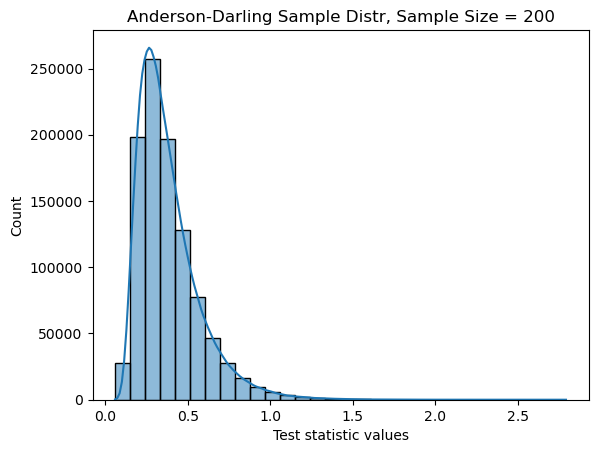

In [29]:
#sample size = 200
rng = np.random.default_rng()
n_trials = 1000000
sample_size = 200

AD_stats_200 = []
rejections = []
for i in range(n_trials):
    data = rng.normal(size=sample_size)
    result = stats.anderson(data, dist='norm')
    #does not return p-value in fn 
    stat = result.statistic
    AD_stats_200.append(stat)
    crit_vals = result.critical_values
    sig_levels = result.significance_level/100
    reject = stat > crit_vals[sig_levels.tolist().index(0.05)]
    rejections.append(reject)
    
rejection_rate = np.mean(rejections)

sns.histplot(AD_stats_200, bins=30, kde=True, edgecolor='black')
plt.xlabel('Test statistic values'); plt.title(f'Anderson-Darling Sample Distr, Sample Size = {sample_size}')
print(f'Rejection_rate: {rejection_rate}')

In [30]:
#save data to df -> csv
data = {'stats_values_AD_10': AD_stats_10,
        'stats_values_AD_30': AD_stats_30,
        'stats_values_AD_50': AD_stats_50,
        'stats_values_AD_100': AD_stats_100,
        'stats_values_AD_200': AD_stats_200}
AD_norm_data = pd.DataFrame(data)
#uncorrelated AD test statistics
AD_norm_data.to_csv('AD_norm_data.csv', index=False)

In [31]:
AD_norm_data

,stats_values_AD_10,stats_values_AD_30,stats_values_AD_50,stats_values_AD_100,stats_values_AD_200
0,0.265983,0.446206,0.174182,0.787702,0.369495
1,0.211144,0.295990,0.271620,0.351857,0.265766
2,0.226464,0.425825,0.505310,0.418618,0.779238
3,0.199940,0.393001,0.428300,0.451075,0.282266
4,0.238505,0.287356,0.200428,0.115790,0.269726
...,...,...,...,...,...
999995,0.178186,0.719491,0.198951,0.570892,0.227097
999996,0.195697,0.182854,0.673691,0.438452,0.174287
999997,0.422909,0.293003,0.488054,0.916922,0.240773
999998,0.721056,0.178303,0.355922,0.766537,0.237546


### Autocorrelated Data

Rejection_rate: 0.04863


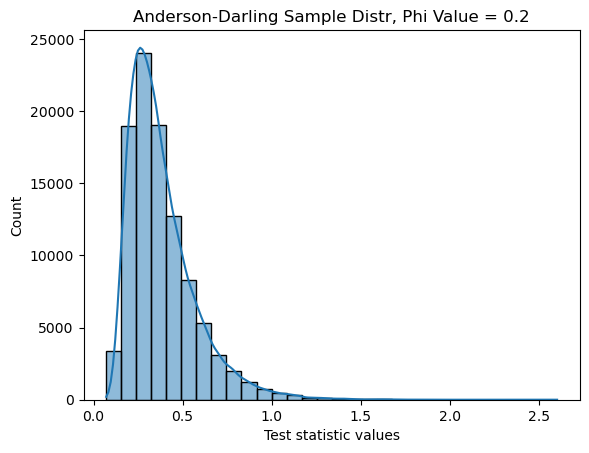

In [67]:
n_trials = 100000
sample_size = 100

AD_stats_phi_1= []
phi_val = 0.2

rejections = []
for i in range(n_trials):
    data = generate_ar1(sample_size, phi=phi_val)
    result = stats.anderson(data, dist='norm')
    #does not return p-value in fn 
    stat = result.statistic
    AD_stats_phi_1.append(stat)
    crit_vals = result.critical_values
    sig_levels = result.significance_level/100
    reject = stat > crit_vals[sig_levels.tolist().index(0.05)]
    rejections.append(reject)
    
rejection_rate = np.mean(rejections)

sns.histplot(AD_stats_phi_1, bins=30, kde=True, edgecolor='black')
plt.xlabel('Test statistic values'); plt.title(f'Anderson-Darling Sample Distr, Phi Value = {phi_val}')
print(f'Rejection_rate: {rejection_rate}')

Rejection_rate: 0.05387


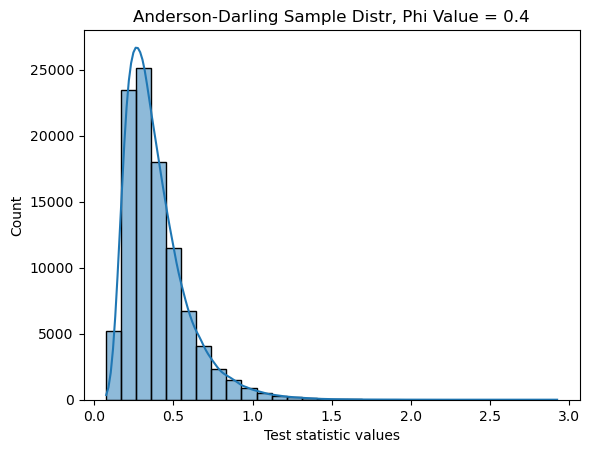

In [68]:
n_trials = 100000
sample_size = 100

AD_stats_phi_2 = []
phi_val = 0.4
rejections = []
for i in range(n_trials):
    data = generate_ar1(sample_size, phi=phi_val)
    result = stats.anderson(data, dist='norm')
    #does not return p-value in fn 
    stat = result.statistic
    AD_stats_phi_2.append(stat)
    crit_vals = result.critical_values
    sig_levels = result.significance_level/100
    reject = stat > crit_vals[sig_levels.tolist().index(0.05)]
    rejections.append(reject)
    
rejection_rate = np.mean(rejections)

sns.histplot(AD_stats_phi_2, bins=30, kde=True, edgecolor='black')
plt.xlabel('Test statistic values'); plt.title(f'Anderson-Darling Sample Distr, Phi Value = {phi_val}')
print(f'Rejection_rate: {rejection_rate}')

Rejection_rate: 0.20421


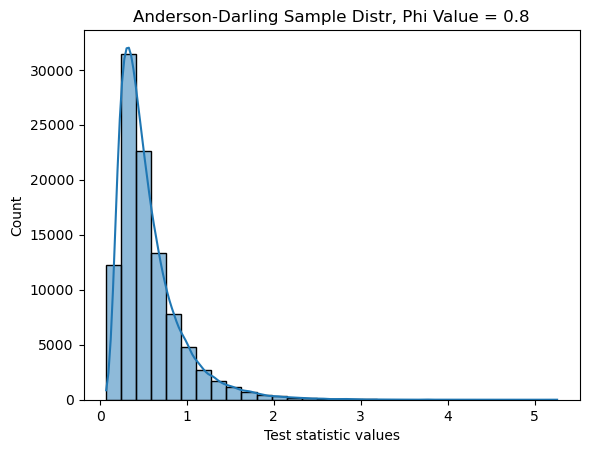

In [69]:
n_trials = 100000
sample_size = 100
phi_val = 0.8
AD_stats_phi_3 = []
rejections = []
for i in range(n_trials):
    data = generate_ar1(sample_size, phi=phi_val)
    result = stats.anderson(data, dist='norm')
    #does not return p-value in fn 
    stat = result.statistic
    AD_stats_phi_3.append(stat)
    crit_vals = result.critical_values
    sig_levels = result.significance_level/100
    reject = stat > crit_vals[sig_levels.tolist().index(0.05)]
    rejections.append(reject)
    
rejection_rate = np.mean(rejections)

sns.histplot(AD_stats_phi_3, bins=30, kde=True, edgecolor='black')
plt.xlabel('Test statistic values'); plt.title(f'Anderson-Darling Sample Distr, Phi Value = {phi_val}')
print(f'Rejection_rate: {rejection_rate}')

Rejection_rate: 0.063829


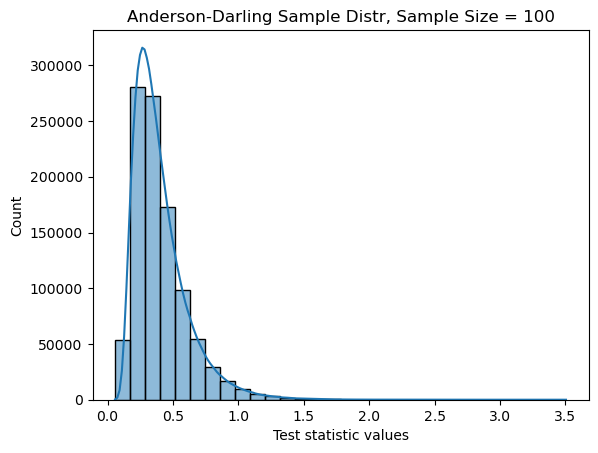

In [21]:
#sample size = 100
n_trials = 1000000
sample_size = 100

AD_stats_100 = []
rejections = []
for i in range(n_trials):
    data = generate_ar1(sample_size, phi=0.5)
    result = stats.anderson(data, dist='norm')
    #does not return p-value in fn 
    stat = result.statistic
    AD_stats_100.append(stat)
    crit_vals = result.critical_values
    sig_levels = result.significance_level/100
    reject = stat > crit_vals[sig_levels.tolist().index(0.05)]
    rejections.append(reject)
    
rejection_rate = np.mean(rejections)

sns.histplot(AD_stats_100, bins=30, kde=True, edgecolor='black')
plt.xlabel('Test statistic values'); plt.title(f'Anderson-Darling Sample Distr, Sample Size = {sample_size}')
print(f'Rejection_rate: {rejection_rate}')

Rejection_rate: 0.062482


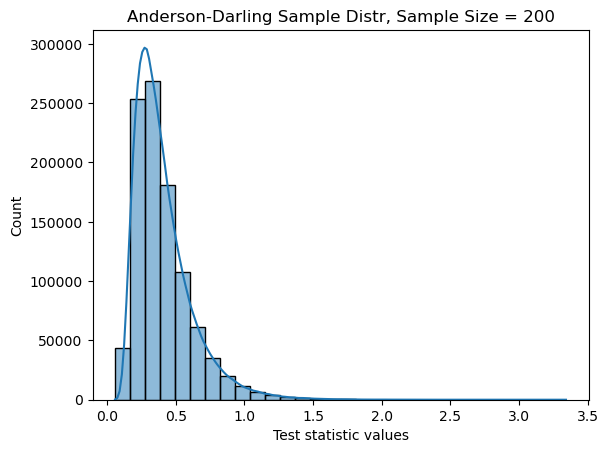

In [22]:
#sample size = 200
n_trials = 1000000
sample_size = 200

AD_stats_200 = []
rejections = []
for i in range(n_trials):
    data = generate_ar1(sample_size, phi=0.5)
    result = stats.anderson(data, dist='norm')
    #does not return p-value in fn 
    stat = result.statistic
    AD_stats_200.append(stat)
    crit_vals = result.critical_values
    sig_levels = result.significance_level/100
    reject = stat > crit_vals[sig_levels.tolist().index(0.05)]
    rejections.append(reject)
    
rejection_rate = np.mean(rejections)

sns.histplot(AD_stats_200, bins=30, kde=True, edgecolor='black')
plt.xlabel('Test statistic values'); plt.title(f'Anderson-Darling Sample Distr, Sample Size = {sample_size}')
print(f'Rejection_rate: {rejection_rate}')

In [23]:
#save data to df -> csv
data = {'stats_values_AD_10': AD_stats_10,
        'stats_values_AD_30': AD_stats_30,
        'stats_values_AD_50': AD_stats_50,
        'stats_values_AD_100': AD_stats_100,
        'stats_values_AD_200': AD_stats_200}
AD_correlated_data = pd.DataFrame(data)
#correlated AD test statistics
AD_correlated_data.to_csv('AD_correlated_data.csv', index=False)

In [24]:
AD_correlated_data

,stats_values_AD_10,stats_values_AD_30,stats_values_AD_50,stats_values_AD_100,stats_values_AD_200
0,0.432647,0.382255,0.278993,0.959209,0.688941
1,0.152505,0.432155,0.631218,0.605965,0.873827
2,0.286414,0.161004,0.727064,1.018982,0.305692
3,0.529859,0.192979,0.319367,0.420548,0.297659
4,1.226357,0.438608,0.454712,0.206513,0.492299
...,...,...,...,...,...
999995,0.182272,0.168681,0.269629,0.188142,0.206134
999996,0.229427,0.255866,0.195953,0.769329,0.296535
999997,0.510650,0.307657,0.634208,0.204630,0.603247
999998,0.554807,0.393479,0.244047,0.899549,0.386823


In [70]:
#save data to df -> csv
data = {'stats_values_AD_phi_1': AD_stats_phi_1,
        'stats_values_AD_phi_2': AD_stats_phi_2,
        'stats_values_AD_phi_3': AD_stats_phi_3}
AD_correlated_phi_data = pd.DataFrame(data)
#correlated AD test statistics
AD_correlated_phi_data.to_csv('AD_correlated_phi_data.csv', index=False)
AD_correlated_phi_data

,stats_values_AD_phi_1,stats_values_AD_phi_2,stats_values_AD_phi_3
0,0.296429,0.791896,0.170884
1,0.267569,0.508284,0.505931
2,0.252650,1.154348,0.284701
3,0.406586,0.327489,0.330257
4,0.432475,0.214527,0.363605
...,...,...,...
99995,0.693973,0.356332,0.254253
99996,0.383503,0.698715,0.576771
99997,0.132977,0.367524,0.369556
99998,0.583243,0.397633,0.625156


In [15]:
#making autocorrelation plot with different phi's, sample size n, differerent type I error
phi_vals = np.arange(0,1.1,0.1)
mu, sigma = 0, 1
n_trials = 1000000
sample_size = 100

rejection_rates_ad = []
for i in range(len(phi_vals)):
    rejections_ad = []
    for j in range(n_trials):
        data = generate_ar1(n = sample_size, phi = phi_vals[i])
        result = stats.anderson(data, dist='norm');
        pvalue = result[1] #get p-value only of tuple 
        rejections_ad.append(pvalue)
    rejection_rate_ad = np.mean(np.array(rejections_ad) < 0.05)
    rejection_rates_ad.append(rejection_rate_ad)

In [16]:
ad_rejection_rates_df = pd.DataFrame(rejection_rates_ad)
ad_rejection_rates_df = ad_rejection_rates_df.set_axis(['Rejection Rates'], axis=1)
ad_rejection_rates_df['Phi Values'] = phi_vals
ad_rejection_rates_df.to_csv('ad_ar1_reject_rates.csv', index=False)
ad_rejection_rates_df

,Rejection Rates,Phi Values
0,0.0,0.0
1,0.0,0.1
2,0.0,0.2
3,0.0,0.3
4,0.0,0.4
5,0.0,0.5
6,0.0,0.6
7,0.0,0.7
8,0.0,0.8
9,0.0,0.9


In [75]:
shapiro_norm_data = pd.read_csv('shapiro_normal_data.csv')
shapiro_correlated_data = pd.read_csv('shapiro_correlated_data.csv')
shapiro_correlated_data

,stats_values_phi_0,stats_values_phi_1,stats_values_phi_2,stats_values_phi_3,stats_values_phi_4,stats_values_200
0,0.977625,0.989090,0.991388,0.992617,0.991678,0.990757
1,0.993878,0.971484,0.986030,0.994357,0.978941,0.993771
2,0.972802,0.991766,0.980189,0.986854,0.993718,0.993735
3,0.984762,0.989408,0.991662,0.965585,0.972823,0.993013
4,0.984112,0.981419,0.988485,0.964788,0.982292,0.991568
...,...,...,...,...,...,...
999995,0.989176,0.991780,0.991080,0.994292,0.981610,0.991253
999996,0.990012,0.991574,0.985892,0.991031,0.993801,0.992933
999997,0.988283,0.985338,0.994767,0.969472,0.997692,0.987601
999998,0.983535,0.994090,0.989735,0.987627,0.990545,0.983918


In [76]:
shapiro_norm_data

,stats_values_10,stats_values_30,stats_values_50,stats_values_100,stats_values_200
0,0.835559,0.951268,0.958391,0.977625,0.990757
1,0.945293,0.990932,0.973156,0.993878,0.993771
2,0.952051,0.989821,0.981243,0.972802,0.993735
3,0.919192,0.911613,0.988064,0.984762,0.993013
4,0.965017,0.950985,0.985668,0.984112,0.991568
...,...,...,...,...,...
999995,0.972761,0.974207,0.983192,0.989176,0.991253
999996,0.939569,0.964584,0.973963,0.990012,0.992933
999997,0.890888,0.975593,0.970728,0.988283,0.987601
999998,0.882371,0.970398,0.977964,0.983535,0.983918


## Figure of Subpanels

In [81]:
ks_norm_data

,stats_ks_values_10,stats_ks_values_20,stats_ks_values_25,stats_ks_values_30,stats_ks_values_100
0,0.214038,0.175720,0.168629,0.112007,0.066067
1,0.330818,0.162342,0.139011,0.151624,0.104798
2,0.294321,0.212422,0.160205,0.153740,0.074477
3,0.143285,0.218526,0.165742,0.180622,0.111210
4,0.123750,0.165809,0.115744,0.069652,0.063252
...,...,...,...,...,...
999995,0.285563,0.203118,0.115776,0.182973,0.070819
999996,0.251997,0.173215,0.109033,0.146143,0.111795
999997,0.298468,0.082723,0.138596,0.126707,0.085508
999998,0.170425,0.109451,0.113427,0.182163,0.071273


In [ ]:
shapiro_correlated_data

In [86]:
lilliefors_norm_data_df

,stats_values_lil_10,stats_values_lil_20,stats_values_lil_25,stats_values_lil_30,stats_values_lil_100
0,0.180827,0.110084,0.164938,0.114381,0.069192
1,0.169699,0.087709,0.135680,0.080229,0.074203
2,0.192790,0.129454,0.095387,0.084108,0.045983
3,0.200423,0.101620,0.084889,0.119027,0.051487
4,0.201867,0.116679,0.120189,0.122994,0.060455
...,...,...,...,...,...
999995,0.174667,0.160430,0.151347,0.098820,0.055431
999996,0.149304,0.096489,0.066959,0.153034,0.091459
999997,0.109817,0.083863,0.120848,0.083483,0.048568
999998,0.208199,0.176831,0.111892,0.112003,0.088815


In [88]:
AD_norm_data

,stats_values_AD_10,stats_values_AD_30,stats_values_AD_50,stats_values_AD_100,stats_values_AD_200
0,0.265983,0.446206,0.174182,0.787702,0.369495
1,0.211144,0.295990,0.271620,0.351857,0.265766
2,0.226464,0.425825,0.505310,0.418618,0.779238
3,0.199940,0.393001,0.428300,0.451075,0.282266
4,0.238505,0.287356,0.200428,0.115790,0.269726
...,...,...,...,...,...
999995,0.178186,0.719491,0.198951,0.570892,0.227097
999996,0.195697,0.182854,0.673691,0.438452,0.174287
999997,0.422909,0.293003,0.488054,0.916922,0.240773
999998,0.721056,0.178303,0.355922,0.766537,0.237546


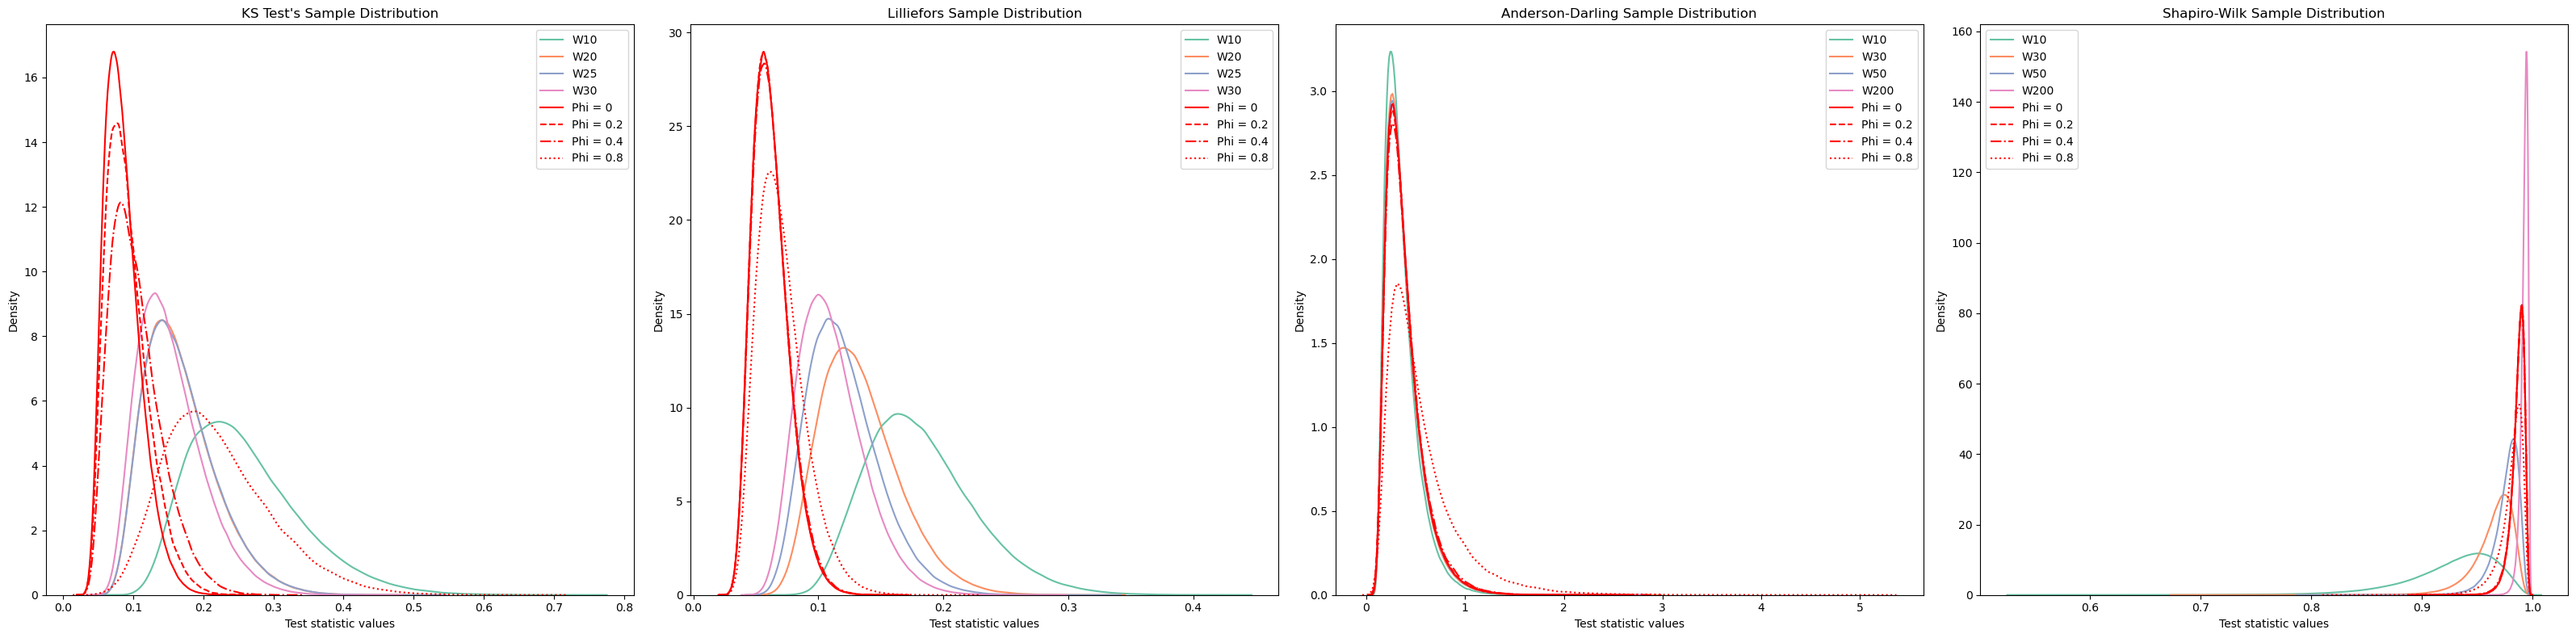

In [93]:
fig, axes = plt.subplots(1, 4, figsize=(32, 8))  # Adjust width for spacing
palette = sns.color_palette("Set2", 5)

### Panel 1: KS Test ###
norm_columns_ks = ['stats_ks_values_10', 'stats_ks_values_20', 'stats_ks_values_25', 'stats_ks_values_30']
labels_ks = ['W10', 'W20', 'W25', 'W30']
ax = axes[0]

for i, (col, label) in enumerate(zip(norm_columns_ks, labels_ks)):
    sns.kdeplot(ks_norm_data[col], label=label, color=palette[i], ax=ax)

sns.kdeplot(ks_norm_data['stats_ks_values_100'], label='Phi = 0', linestyle='-', color='red', ax=ax)
sns.kdeplot(ks_correlated_phi_data['stats_values_phi_1'], label='Phi = 0.2', linestyle='--', color='red', ax=ax)
sns.kdeplot(ks_correlated_phi_data['stats_values_phi_2'], label='Phi = 0.4', linestyle='-.', color='red', ax=ax)
sns.kdeplot(ks_correlated_phi_data['stats_values_phi_3'], label='Phi = 0.8', linestyle=':', color='red', ax=ax)

ax.set_title("KS Test's Sample Distribution")
ax.set_xlabel("Test statistic values")
ax.legend()

### Panel 2: Lilliefors ###
norm_columns_lil = ['stats_values_lil_10', 'stats_values_lil_20', 'stats_values_lil_25', 'stats_values_lil_30']
labels_lil = ['W10', 'W20', 'W25', 'W30']
ax = axes[1]

for i, (col, label) in enumerate(zip(norm_columns_lil, labels_lil)):
    sns.kdeplot(lilliefors_norm_data_df[col], label=label, color=palette[i], ax=ax)

sns.kdeplot(lilliefors_norm_data_df['stats_values_lil_100'], label='Phi = 0', linestyle='-', color='red', ax=ax)
sns.kdeplot(lilliefors_correlated_phi_data['stats_values_phi_1'], label='Phi = 0.2', linestyle='--', color='red', ax=ax)
sns.kdeplot(lilliefors_correlated_phi_data['stats_values_phi_2'], label='Phi = 0.4', linestyle='-.', color='red', ax=ax)
sns.kdeplot(lilliefors_correlated_phi_data['stats_values_phi_3'], label='Phi = 0.8', linestyle=':', color='red', ax=ax)

ax.set_title("Lilliefors Sample Distribution")
ax.set_xlabel("Test statistic values")
ax.legend()

### Panel 3: Anderson-Darling ###
norm_columns_ad = ['stats_values_AD_10', 'stats_values_AD_30', 'stats_values_AD_50', 'stats_values_AD_200']
labels_ad = ['W10', 'W30', 'W50', 'W200']
ax = axes[2]

for i, (col, label) in enumerate(zip(norm_columns_ad, labels_ad)):
    sns.kdeplot(AD_norm_data[col], label=label, color=palette[i], ax=ax)

sns.kdeplot(AD_norm_data['stats_values_AD_100'], label='Phi = 0', linestyle='-', color='red', ax=ax)
sns.kdeplot(AD_correlated_phi_data['stats_values_AD_phi_1'], label='Phi = 0.2', linestyle='--', color='red', ax=ax)
sns.kdeplot(AD_correlated_phi_data['stats_values_AD_phi_2'], label='Phi = 0.4', linestyle='-.', color='red', ax=ax)
sns.kdeplot(AD_correlated_phi_data['stats_values_AD_phi_3'], label='Phi = 0.8', linestyle=':', color='red', ax=ax)

ax.set_title("Anderson-Darling Sample Distribution")
ax.set_xlabel("Test statistic values")
ax.legend()

### Panel 4: Shapiro-Wilk ###
norm_columns_sw = ['stats_values_10', 'stats_values_30', 'stats_values_50', 'stats_values_200']
labels_sw = ['W10', 'W30', 'W50', 'W200']
ax = axes[3]

for i, (col, label) in enumerate(zip(norm_columns_sw, labels_sw)):
    sns.kdeplot(shapiro_norm_data[col], label=label, color=palette[i], ax=ax)

sns.kdeplot(shapiro_norm_data['stats_values_100'], label='Phi = 0', linestyle='-', color='red', ax=ax)
sns.kdeplot(shapiro_correlated_data['stats_values_phi_1'], label='Phi = 0.2', linestyle='--', color='red', ax=ax)
sns.kdeplot(shapiro_correlated_data['stats_values_phi_2'], label='Phi = 0.4', linestyle='-.', color='red', ax=ax)
sns.kdeplot(shapiro_correlated_data['stats_values_phi_4'], label='Phi = 0.8', linestyle=':', color='red', ax=ax)

ax.set_title("Shapiro-Wilk Sample Distribution")
ax.set_xlabel("Test statistic values")
ax.legend()

plt.tight_layout()
plt.show()

In [94]:
ad_ar1_reject_rates_df = pd.read_csv('ad_ar1_reject_rates.csv')
ks_ar1_reject_rates_df = pd.read_csv('ks_ar1_reject_rates.csv')
lilliefors_ar1_reject_rates_df = pd.read_csv('lilliefors_ar1_reject_rates.csv')
shapiro_ar1_reject_rates_df = pd.read_csv('shapiro_ar1_reject_rates.csv')

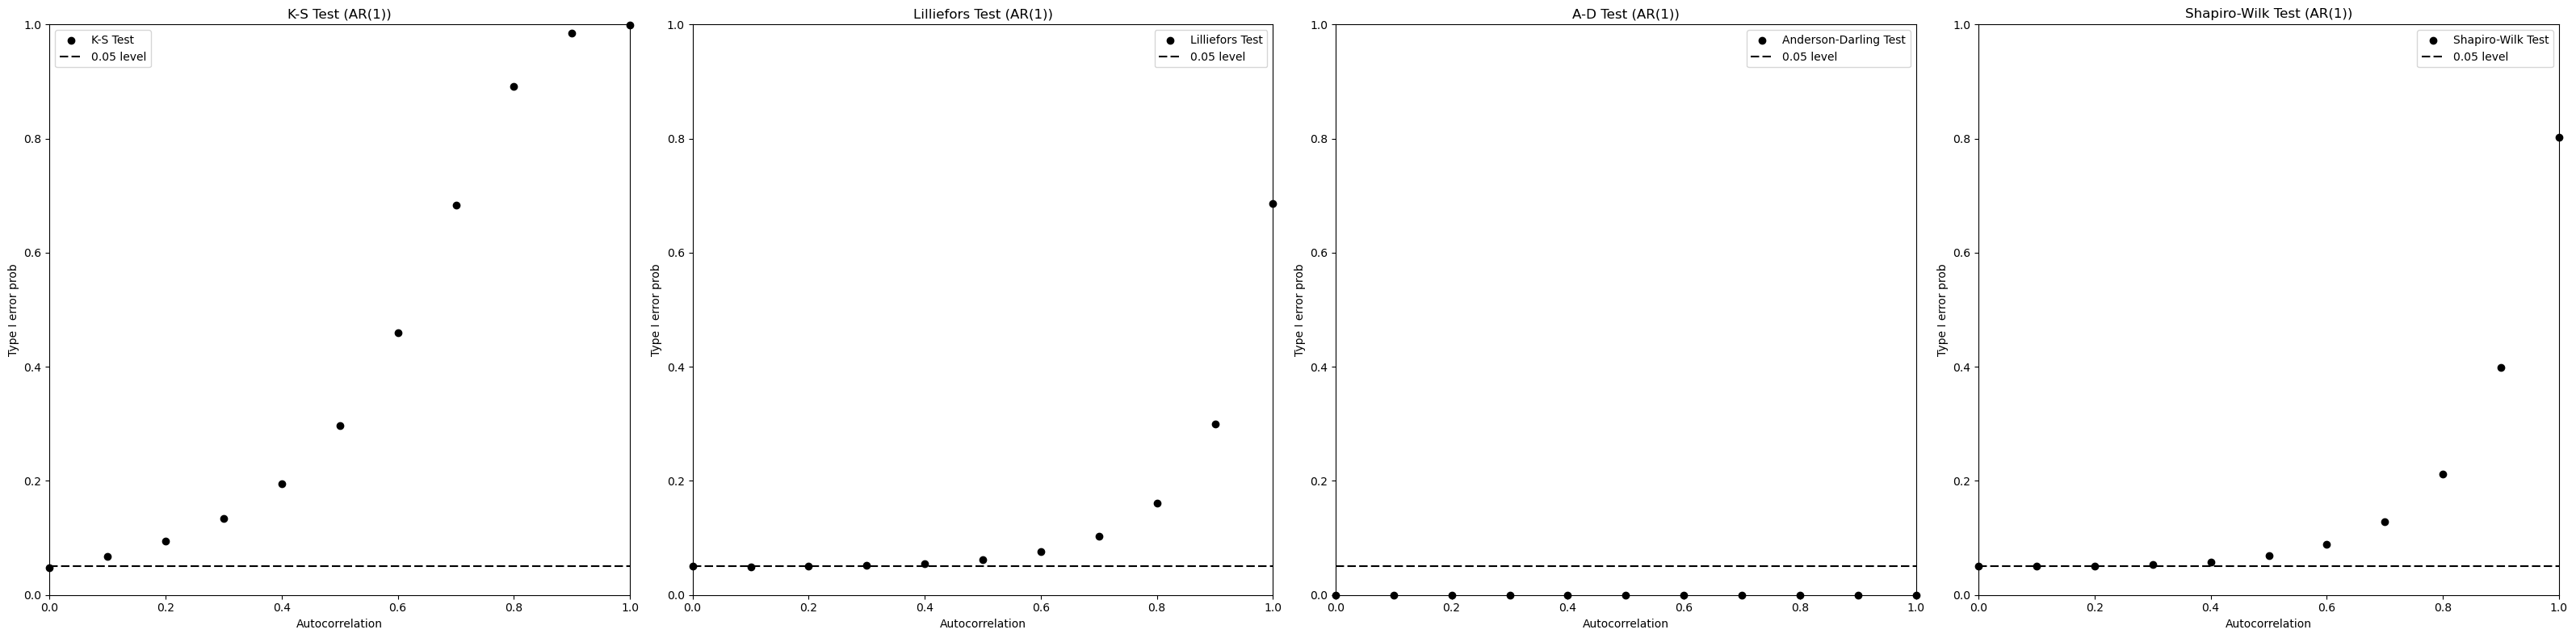

In [98]:
fig, axes = plt.subplots(1, 4, figsize=(32, 8))
x_ticks = np.arange(0, 1.2, 0.2)
y_ticks = np.arange(0, 1.2, 0.2)

###KS Test###
ax = axes[0]
ax.scatter(ks_ar1_reject_rates_df['Phi Values'], ks_ar1_reject_rates_df['Rejection Rates'], color='black', clip_on=False, label='K-S Test')
ax.axhline(y=0.05, color='k', linestyle='--', dashes=(5, 2), label='0.05 level')
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.0)
ax.set_xlabel('Autocorrelation')
ax.set_ylabel('Type I error prob')
ax.set_title('K-S Test (AR(1))')
ax.legend()

###Lilliefors Test###
ax = axes[1]
ax.scatter(lilliefors_ar1_reject_rates_df['Phi Values'], lilliefors_ar1_reject_rates_df['Rejection Rates'], color='black', clip_on=False, label='Lilliefors Test')
ax.axhline(y=0.05, color='k', linestyle='--', dashes=(5, 2), label='0.05 level')
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.0)
ax.set_xlabel('Autocorrelation')
ax.set_ylabel('Type I error prob')
ax.set_title('Lilliefors Test (AR(1))')
ax.legend()

###Anderson-Darling Test###
ax = axes[2]
ax.scatter(ad_ar1_reject_rates_df['Phi Values'], ad_ar1_reject_rates_df['Rejection Rates'], color='black', clip_on=False, label='Anderson-Darling Test')
ax.axhline(y=0.05, color='k', linestyle='--', dashes=(5, 2), label='0.05 level')
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.0)
ax.set_xlabel('Autocorrelation')
ax.set_ylabel('Type I error prob')
ax.set_title('A-D Test (AR(1))')
ax.legend()

###Shapiro-Wilk Test###
ax = axes[3]
ax.scatter(shapiro_ar1_reject_rates_df['Phi Values'], shapiro_ar1_reject_rates_df['Rejection Rates'], color='black', clip_on=False, label='Shapiro-Wilk Test')
ax.axhline(y=0.05, color='k', linestyle='--', dashes=(5, 2), label='0.05 level')
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.0)
ax.set_xlabel('Autocorrelation')
ax.set_ylabel('Type I error prob')
ax.set_title('Shapiro-Wilk Test (AR(1))')
ax.legend()

plt.tight_layout()
plt.show()